# **Reading the Data from Database**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import pandas as pd

## **Step 1**: *Reading the Tables from Database file*

In [ ]:
# Read the code below and write your observation in the next cell
conn = sqlite3.connect('D:\Search Engine Data\eng_subtitles_database.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

[('zipfiles',)]


**In the above cell, I am able to read the table inside the database. As mentioned earlier, table name is `zipfiles`. We also know from README.txt that this table contains three columns: 'num', 'name' and 'content'.**

## **Step 2**: *Reading the columns of Table*

In [ ]:
cursor.execute("PRAGMA table_info('zipfiles')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

num
name
content


**The above code helps in checking the column names in the database table.**

**Let's now use `SELECT * FROM zipfiles` to read all the data into a `df` variable.**

## **Step 3:** *Loading the Database Table inside a Pandas DataFrame*

In [ ]:
df = pd.read_sql_query("""SELECT * FROM zipfiles""", conn)
df.head()

,num,name,content
0,9180533,the.message.(1976).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x...
1,9180583,here.comes.the.grump.s01.e09.joltin.jack.in.bo...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x17\xb9\x...
2,9180592,yumis.cells.s02.e13.episode.2.13.(2022).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00L\xb9\x99V...
3,9180594,yumis.cells.s02.e14.episode.2.14.(2022).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00U\xa9\x99V...
4,9180600,broker.(2022).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x001\xa9\x99V...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82498 entries, 0 to 82497
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   num      82498 non-null  int64 
 1   name     82498 non-null  object
 2   content  82498 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


**Looks like the `content` column donot contain the subtitles text. Instead as mentioned in README.txt, it might be latin-1 encoded.**

## **Step 4**:  *Printing `content` of 0th Row*

In [ ]:
b_data = df.iloc[0, 2]

# here 2 represent the index of content column
# 0 represents the row number

In [ ]:
print(b_data)

b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x99V\x9fx\x96\xf0\x8c\x9e\x00\x00\x86\x9b\x01\x00;\x00\x00\x00The.Message.1976.REMASTERED.1080p.BluRay.x264-PiGNUS.EN.srt\xad\xbdm\x93\xdc\xc6\x91.\xfa\x9d\x11\xfc\x0f-}\xe1=\x11-\x9d\x06P\x85\x17\x9d\x8d\xd5%%[\xa4-Y>&u\x15>\xdf\xd0\xd3\x98\x19x\xfae\x0cts<\xfe\xf57\x9f\'\xb3\n\xd9\xa4\xbc\xbb\xf7\xc6Fl\xacELW\xa2\xaa\x90\x95\x95\xafO\x16/_l6\xdf\xe0\xff\xea\xf5f\xb3Y}\xf5\xd5\xbf\xaf\xf4AQ\xae7Mx\xf9\xe2\xd7\xfe|s\xbf\xea\x8f\xcf\xab\x8f\xe3n8\xadN\xc7\xfdx\x1cVO\xe3\xf9~\xf5\xf3\xe3p\xfc\xea\xfd/o>\xbc\xfb\xf0\xe3\xef\xde\xbf|\xf1\xfbi\x18Vo\xa6\xd3\xd3<L\xab\xe1\x1f\xe7\xe18\x8f\xa7\xe37\xab\xd3\xbc\xdb~-\xc3\x1e\xfe\xa7<|\xf9\xe2\xe5\x8bR_[~S\xd6\xeb\xa2k\xf3k\xe5A\xb7\xeeb\xf5\xf2\xc5\xbb\xe3\xea|?\xac\x8e\xfdaX\x9dnW?\x9cvk>8\x9c\xe6\xf3\xean\xeao\xc6\xd3ev\x8f~\x1a\xa6\x9b\xf1\xf6\xb2\xff\x1a\xe4\xabD\xbe*d\x11\xa5#_U\xeb\xaa\xd9`\xa6\xa7\xc3\xea\xa7\xcb}\x7f8\xf4F\xf9\xa7a\x9e\x87\xe3\x9d\xcc\\\xdf\x07B!\x13\xaa\xd61n<!\xd9\xaf\xd0\

**From the content, it appears to start with the bytes "PK\x03\......", which suggests that it might be a ZIP archive file. How do I know it? Experience! I have worked with something similar earlier.**

## **Step 5:** *Unzipping the content of 385th row and decoding using `latin-1`*

In [ ]:
import zipfile
import io

# Assuming 'content' is the binary data from your database
binary_data = df.iloc[385, 2]

# Decompress the binary data using the zipfile module
with io.BytesIO(binary_data) as f:
    with zipfile.ZipFile(f, 'r') as zip_file:
        # Reading only one file in the ZIP archive
        subtitle_content = zip_file.read(zip_file.namelist()[0])

# Now 'subtitle_content' should contain the extracted subtitle content
print(subtitle_content.decode('latin-1'))  # Assuming the content is latin-1 encoded text

1
00:00:06,000 --> 00:00:12,074
Watch any video online with Open-SUBTITLES
Free Browser extension: osdb.link/ext

2
00:00:15,370 --> 00:00:16,506
You lose everything, my girl.

3
00:00:16,530 --> 00:00:19,360
So you've said - four times.

4
00:00:20,330 --> 00:00:22,120
I definitely had
it on yesterday.

5
00:00:22,465 --> 00:00:25,785
Your gloves, your keys, that
handkerchief I embroidered for you

6
00:00:25,809 --> 00:00:26,168
Everything!

7
00:00:26,192 --> 00:00:27,280
Five times.

8
00:00:31,610 --> 00:00:32,920
Miss Scarlet?
- Yes.

9
00:00:36,390 --> 00:00:37,390
I'm Miss Scarlet.

10
00:00:37,872 --> 00:00:40,880
May I inquire if
you've lost something?

11
00:00:41,350 --> 00:00:42,530
Some jewellery perhaps?

12
00:00:42,870 --> 00:00:45,130
Yes, my mother's wedding ring.

13
00:00:45,220 --> 00:00:45,840
Have you found it?

14
00:00:45,950 --> 00:00:47,656
Does your ring have
an inscription?

15
00:00:48,650 --> 00:00:51,720
From my father to my mother 'For
my beloved, Livi

**Look's like it worked.**

## **Step 6:** *Applying the above Function on the Entire Data*

In [ ]:
import zipfile
import io

count = 0

def decode_method(binary_data):
    global count
    # Decompress the binary data using the zipfile module
    # print(count, end=" ")
    count += 1
    with io.BytesIO(binary_data) as f:
        with zipfile.ZipFile(f, 'r') as zip_file:
            # Assuming there's only one file in the ZIP archive
            subtitle_content = zip_file.read(zip_file.namelist()[0])

    # Now 'subtitle_content' should contain the extracted subtitle content
    return subtitle_content.decode('latin-1')  # Assuming the content is UTF-8 encoded text

In [ ]:
df['file_content'] = df['content'].apply(decode_method)

df.head()

,num,name,content,file_content
0,9180533,the.message.(1976).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x1c\xa9\x...,"1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch an..."
1,9180583,here.comes.the.grump.s01.e09.joltin.jack.in.bo...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x17\xb9\x...,"1\r\n00:00:29,359 --> 00:00:32,048\r\nAh! Ther..."
2,9180592,yumis.cells.s02.e13.episode.2.13.(2022).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00L\xb9\x99V...,"1\r\n00:00:53,200 --> 00:00:56,030\r\n<i>Yumi'..."
3,9180594,yumis.cells.s02.e14.episode.2.14.(2022).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00U\xa9\x99V...,"1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch an..."
4,9180600,broker.(2022).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x001\xa9\x99V...,"ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82498 entries, 0 to 82497
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   num           82498 non-null  int64 
 1   name          82498 non-null  object
 2   content       82498 non-null  object
 3   file_content  82498 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.5+ MB


In [ ]:
df.tail()

,num,name,content,file_content
82493,9521935,the.prophets.game.(2000).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xb8\xa6\x...,"ï»¿1\r\n00:01:16,284 --> 00:01:19,537\r\nGod,\..."
82494,9521937,west.beirut.(1998).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x13\x97\x...,"1\r\n00:00:06,000 --> 00:00:12,074\r\napi.Open..."
82495,9521938,frankenstein.the.true.story.(1973).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00$\x97\x9aV...,"1\r\n00:00:01,001 --> 00:00:04,630\r\n(Dramati..."
82496,9521940,frankenstein.the.true.story.(1973).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x97\x...,"1\r\n00:00:06,000 --> 00:00:12,074\r\nAdvertis..."
82497,9521941,zombie.island.massacre.(1984).eng.1cd,"b'PK\x03\x04\x14\x00\x00\x00\x08\x00,\x97\x9aV...","1\r\n00:00:01,919 --> 00:00:03,253\r\n(Sharp w..."


In [ ]:
df.file_content[0]

'1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch any video online with Open-SUBTITLES\r\nFree Browser extension: osdb.link/ext\r\n\r\n2\r\n00:02:26,198 --> 00:02:29,953\r\nIn the name of God, the most gracious, the most Merciful.\r\n\r\n3\r\n00:02:31,072 --> 00:02:33,370\r\nFrom Muhammad, the Messenger of God\r\n\r\n4\r\n00:02:33,550 --> 00:02:36,047\r\nto Heraclius, the emperor of Byzantium.\r\n\r\n5\r\n00:02:36,407 --> 00:02:39,464\r\ngreetings to him who is the\r\nfollower of righteous guidance.\r\n\r\n6\r\n00:02:39,783 --> 00:02:42,591\r\nI bid you to hear the divine call.\r\n\r\n7\r\n00:02:43,160 --> 00:02:45,817\r\nI am the messenger of God to the people;\r\n\r\n8\r\n00:02:46,337 --> 00:02:48,784\r\naccept Islam for your salvation.\r\n\r\n9\r\n00:02:52,231 --> 00:02:54,709\r\nHe speaks of a new prophet in Arabia.\r\n\r\n10\r\n00:02:55,068 --> 00:02:57,825\r\nWas it like this when John, the Baptist\r\ncame to king Herod\r\n\r\n11\r\n00:02:58,145 --> 00:03:01,272\r\nout of the desert, 

## **Step 7:** *Sample 30% of the data*

In [ ]:
data = df.sample(frac=0.3, random_state=42)

In [ ]:
print(data.shape)
data.head()

(24749, 4)


,num,name,content,file_content
0,9251120,maybe.this.time.(2014).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x89\x9a\x...,"ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch..."
1,9211589,down.the.shore.s01.e10.and.justice.for.all.(19...,b'PK\x03\x04\x14\x00\x00\x00\x08\x007\x8f\x99V...,"1\r\n00:00:09,275 --> 00:00:11,876\r\n¶ Oh, I ..."
2,9380845,uncontrollably.fond.s01.e07.heartache.(2016).e...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x8f\x19\x...,"1\r\n00:00:07,140 --> 00:00:14,220\r\n<i>Timin..."
3,9301436,screen.two.s13.e04.the.precious.blood.(1996).e...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00[\xaa\x99V...,"1\r\n00:00:06,133 --> 00:00:08,900\r\n[etherea..."
4,9408707,battlebots.(2015).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xf4<\x9aV...,"ï»¿1\r\n00:00:01,480 --> 00:00:03,570\r\n[Chri..."


In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
print(data.name)

0                           maybe.this.time.(2014).eng.1cd
1        down.the.shore.s01.e10.and.justice.for.all.(19...
2        uncontrollably.fond.s01.e07.heartache.(2016).e...
3        screen.two.s13.e04.the.precious.blood.(1996).e...
4                                battlebots.(2015).eng.1cd
                               ...                        
24744      kevin.can.wait.s01.e13.ring.worm.(2017).eng.1cd
24745              bia.s01.e29.episode.1.29.(2019).eng.1cd
24746    heroes.s02.e11.chapter.eleven.powerless.(2007)...
24747    hot.in.cleveland.s05.e09.bad.george.clooney.(2...
24748    silk.stalkings.s04.e18.i.know.what.scares.you....
Name: name, Length: 24749, dtype: object


## **Step 8:** *Apply Cleaning on subtitle documents*

In [ ]:
data.file_content[0]

'ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch any video online with Open-SUBTITLES\r\nFree Browser extension: osdb.link/ext\r\n\r\n2\r\n00:00:37,328 --> 00:00:39,706\r\n<i>It could\'ve been\r\njust another summer.</i>\r\n\r\n3\r\n00:00:40,790 --> 00:00:43,042\r\n<i>But as I set foot on the sand,</i>\r\n\r\n4\r\n00:00:43,209 --> 00:00:46,212\r\n<i>that summer\r\nsuddenly felt different.</i>\r\n\r\n5\r\n00:00:55,221 --> 00:00:56,973\r\n<i>Like it was going to be the summer</i>\r\n\r\n6\r\n00:00:57,098 --> 00:00:59,142\r\n<i>that would change my life.</i>\r\n\r\n7\r\n00:00:59,350 --> 00:01:01,770\r\n<i>The summer of freedom.</i>\r\n\r\n8\r\n00:01:02,562 --> 00:01:05,607\r\n<i>The summer of\r\nendless possibilities.</i>\r\n\r\n9\r\n00:01:06,274 --> 00:01:09,402\r\n<i>The summer of 2007.</i>\r\n\r\n10\r\n00:01:16,493 --> 00:01:18,036\r\nOoh, aah!\r\n\r\n11\r\n00:01:24,459 --> 00:01:26,169\r\nOoh, oh!\r\n\r\n12\r\n00:01:26,377 --> 00:01:28,254\r\n<i>â\x99ª Oh, oh, ooh â\x99ª</i>\r\n\r\n13\

In [ ]:
import re

def clean_subtitle(subtitle):
    # Remove timestamp and special characters
    subtitle = re.sub(r'<[^>]*>', '', subtitle)  # Remove HTML tags
    subtitle = re.sub(r'\r\n', ' ', subtitle)  # Replace newlines with spaces
    subtitle = re.sub(r'[^a-zA-Z\s]', '', subtitle)  # Remove non-alphabetic characters

    # Convert to lowercase
    subtitle = subtitle.lower()

    # Remove extra spaces
    subtitle = re.sub(r'\s+', ' ', subtitle).strip()

    return subtitle

In [ ]:
clean_subtitle(data.file_content[0])

'watch any video online with opensubtitles free browser extension osdblinkext it couldve been just another summer but as i set foot on the sand that summer suddenly felt different like it was going to be the summer that would change my life the summer of freedom the summer of endless possibilities the summer of ooh aah ooh oh oh oh ooh that was the summer of you and me youre quite the dancer why did you stop come on keep dancing whatever im kidding dont get mad huh what hey im just going to get my towel what stop that you thought i was gonna kiss you no excuse me i wanna kiss you but not just yet what do you mean not yet only when youre my girl what do you mean your girl my girlfriend miss as if you wish and dont call me miss dont pretend to be a gentleman when youre clearly not so what should i call you rude snob bitch and you douche handsome conceited just like you huh jerk exactly your type leave me alone steph aha steph ill just call you tep remove the s and the f by the way im ton

In [ ]:
clean_subtitle(data.file_content[1])

'oh i know that its getting late but i dont wanna go home im in no hurry baby time can wait cause i dont wanna go home i know we had to try to reach up and touch the sky baby whatever happened to you and i and i dont wanna go home watch any video online with opensubtitles free browser extension osdblinkext guys guys you dont understand this isnt just any wet tshirt contest this is mickey greens sixth annual breastfest hundreds of girls forget that thousands of breasts all pressed together on a small wet stage with the three of us right there celebrating our manhood mugs of beer in one hand buckets of water in the other im not sure im ready for that im ready im not sure i can go im not that comfortable being in the same room with wet breasts last time you were in a room with a wet breast was when you took a steam bath with your grandfather i remember eddies grandfather boy he was stacked come on eddie itll be fun i dont know youre unbelievable you wont go to strip joints you hate bachel

In [ ]:
clean_subtitle(data.file_content[2])

'timing and subtitles by the uncontrollable lovebirds team viki episode watch any video online with opensubtitles free browser extension osdblinkext i came all this way to take you to the island over there but ill go by myself if i take you along i feel like i will want to hide you away on the island and not let you go to anyone else so dont ever appear in front of my eyes if i see you again i will just kidnap you are you sleeping right now after worrying a person so much how can you sleep are you shooting a film as if i wouldnt know that youre an actor of some kind i must be crazy what kind of crazy things have i done because of you i spent so much on an expensive taxi ride to get here from seoul i couldnt even sleep in the cold shivering and waiting for the boat i got my hand bitten by a seagull too ah my money i could have fed my jik so much meat with that money one do you think this is all a dream by any chance its not a dream its me no eul i came all the way here to see you two wo

In [ ]:
data['clean_subtitle'] = data.file_content.apply(clean_subtitle)

In [ ]:
data.head()

,num,name,content,file_content,clean_subtitle
0,9251120,maybe.this.time.(2014).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x89\x9a\x...,"ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch...",watch any video online with opensubtitles free...
1,9211589,down.the.shore.s01.e10.and.justice.for.all.(19...,b'PK\x03\x04\x14\x00\x00\x00\x08\x007\x8f\x99V...,"1\r\n00:00:09,275 --> 00:00:11,876\r\n¶ Oh, I ...",oh i know that its getting late but i dont wan...
2,9380845,uncontrollably.fond.s01.e07.heartache.(2016).e...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x8f\x19\x...,"1\r\n00:00:07,140 --> 00:00:14,220\r\n<i>Timin...",timing and subtitles by the uncontrollable lov...
3,9301436,screen.two.s13.e04.the.precious.blood.(1996).e...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00[\xaa\x99V...,"1\r\n00:00:06,133 --> 00:00:08,900\r\n[etherea...",ethereal music apiopensubtitlesorg is deprecat...
4,9408707,battlebots.(2015).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xf4<\x9aV...,"ï»¿1\r\n00:00:01,480 --> 00:00:03,570\r\n[Chri...",chris oh no not the minibots yelling oh you le...


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_subtitles(subtitle):
    # Convert to lowercase
    subtitle = subtitle.lower()

    # Tokenization
    words = word_tokenize(subtitle)

    # Remove stopwords
    # stop_words = set(stopwords.words('english'))
    # words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join tokens back into a single string
    cleaned_subtitle = ' '.join(words)

    return cleaned_subtitle

In [ ]:
data['clean_subtitle2'] = data.clean_subtitle.apply(preprocess_subtitles)

In [ ]:
data.head()

,num,name,content,file_content,clean_subtitle,clean_subtitle2
0,9251120,maybe.this.time.(2014).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x89\x9a\x...,"ï»¿1\r\n00:00:06,000 --> 00:00:12,074\r\nWatch...",watch any video online with opensubtitles free...,watch any video online with opensubtitles free...
1,9211589,down.the.shore.s01.e10.and.justice.for.all.(19...,b'PK\x03\x04\x14\x00\x00\x00\x08\x007\x8f\x99V...,"1\r\n00:00:09,275 --> 00:00:11,876\r\n¶ Oh, I ...",oh i know that its getting late but i dont wan...,oh i know that it getting late but i dont wan ...
2,9380845,uncontrollably.fond.s01.e07.heartache.(2016).e...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x8f\x19\x...,"1\r\n00:00:07,140 --> 00:00:14,220\r\n<i>Timin...",timing and subtitles by the uncontrollable lov...,timing and subtitle by the uncontrollable love...
3,9301436,screen.two.s13.e04.the.precious.blood.(1996).e...,b'PK\x03\x04\x14\x00\x00\x00\x08\x00[\xaa\x99V...,"1\r\n00:00:06,133 --> 00:00:08,900\r\n[etherea...",ethereal music apiopensubtitlesorg is deprecat...,ethereal music apiopensubtitlesorg is deprecat...
4,9408707,battlebots.(2015).eng.1cd,b'PK\x03\x04\x14\x00\x00\x00\x08\x00\xf4<\x9aV...,"ï»¿1\r\n00:00:01,480 --> 00:00:03,570\r\n[Chri...",chris oh no not the minibots yelling oh you le...,chris oh no not the minibots yelling oh you le...


In [ ]:
col = ['num', 'name', 'clean_subtitle2']
data = data[col]

In [ ]:
print(data.shape)
data

(24749, 3)


,num,name,clean_subtitle2
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...
1,9211589,down.the.shore.s01.e10.and.justice.for.all.(19...,oh i know that it getting late but i dont wan ...
2,9380845,uncontrollably.fond.s01.e07.heartache.(2016).e...,timing and subtitle by the uncontrollable love...
3,9301436,screen.two.s13.e04.the.precious.blood.(1996).e...,ethereal music apiopensubtitlesorg is deprecat...
4,9408707,battlebots.(2015).eng.1cd,chris oh no not the minibots yelling oh you le...
...,...,...,...
24744,9458807,kevin.can.wait.s01.e13.ring.worm.(2017).eng.1cd,script info title default file scripttype v wr...
24745,9244890,bia.s01.e29.episode.1.29.(2019).eng.1cd,where did that come from i dont know it a tape...
24746,9345965,heroes.s02.e11.chapter.eleven.powerless.(2007)...,previously on hero tell me where i can find th...
24747,9417351,hot.in.cleveland.s05.e09.bad.george.clooney.(2...,hot in cleveland is recorded in front of a liv...


## **Step 9:** *Save Dataframe*

In [ ]:
# Save DataFrame to a file (e.g., CSV)
data.to_csv('D:\Serarch Engin Dataset\clean_data_with_stopwords.csv', index=False)

## **Step 10:** *Apply 'Document Chunker' on Subtitles*

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Search Engine Dataset/clean_chunk_data.csv')

In [ ]:
# Assuming 'data' is your DataFrame
# desired_columns = ['num', 'name', 'clean_subtitle2']
# extracted_data = data[desired_columns]

In [ ]:
data

,num,name,clean_subtitle2
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...
1,9211589,down.the.shore.s01.e10.and.justice.for.all.(19...,oh i know that it getting late but i dont wan ...
2,9380845,uncontrollably.fond.s01.e07.heartache.(2016).e...,timing and subtitle by the uncontrollable love...
3,9301436,screen.two.s13.e04.the.precious.blood.(1996).e...,ethereal music apiopensubtitlesorg is deprecat...
4,9408707,battlebots.(2015).eng.1cd,chris oh no not the minibots yelling oh you le...
...,...,...,...
24744,9458807,kevin.can.wait.s01.e13.ring.worm.(2017).eng.1cd,script info title default file scripttype v wr...
24745,9244890,bia.s01.e29.episode.1.29.(2019).eng.1cd,where did that come from i dont know it a tape...
24746,9345965,heroes.s02.e11.chapter.eleven.powerless.(2007)...,previously on hero tell me where i can find th...
24747,9417351,hot.in.cleveland.s05.e09.bad.george.clooney.(2...,hot in cleveland is recorded in front of a liv...


In [ ]:
def document_chunker_by_words(document, chunk_size_words, overlap_words):
    words = document.split()
    chunks = []
    start = 0
    end = chunk_size_words

    while start < len(words):
        chunk = ' '.join(words[start:end])
        chunks.append(chunk)
        start += chunk_size_words - overlap_words
        end = start + chunk_size_words

    return chunks

# Set chunking parameters
chunk_size_words = 500  # Adjust according to your requirements
overlap_words = 20  # Adjust according to your requirements

# Perform chunking on the dataset
chunked_data = []
for index, row in data.iterrows():
    chunks = document_chunker_by_words(row['clean_subtitle2'], chunk_size_words, overlap_words)
    for chunk in chunks:
        chunked_data.append({
            'num': row['num'],
            'name': row['name'],
            'chunk': chunk
        })

# Convert the chunked data to a DataFrame
chunked_df = pd.DataFrame(chunked_data)


In [ ]:
chunked_df.head(50)

,num,name,chunk
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...
1,9251120,maybe.this.time.(2014).eng.1cd,just teach them how to swim in a sinking boat ...
2,9251120,maybe.this.time.(2014).eng.1cd,you know tep once i have enough money from wor...
3,9251120,maybe.this.time.(2014).eng.1cd,that moment i wanted to be part of your world ...
4,9251120,maybe.this.time.(2014).eng.1cd,how will the girl feel a angry b surprised or ...
5,9251120,maybe.this.time.(2014).eng.1cd,force me to learn to use chopstick you used to...
6,9251120,maybe.this.time.(2014).eng.1cd,with a highend crowd which is the target marke...
7,9251120,maybe.this.time.(2014).eng.1cd,no reason for me to feel uncomfortable right d...
8,9251120,maybe.this.time.(2014).eng.1cd,anything uh i just wanted to know if im after ...
9,9251120,maybe.this.time.(2014).eng.1cd,that you loved me oh well i guess when someone...


## **Step 11:** *Save the Dataframe and Read the Dataframe*

In [ ]:
# Save DataFrame to a file (e.g., CSV)
chunked_df.to_csv('D:\Serarch Engin Dataset\clean_chunk_data.csv', index=False)

NameError: name 'chunked_df' is not defined

In [ ]:
chunked_df.shape

(262891, 3)

In [ ]:
import pandas as pd
chunked_df = pd.read_csv('/content/drive/MyDrive/Search Engine Dataset/clean_chunk_data.csv')

## **Step 12:** Visuallizing an overall `Word Cloud` from the given data

In [ ]:
chunked_df.chunk.sample(10000)

222207    i ate my pear you stood there eating your pear...
180446    yeah okay supply okay im chilly i think im gon...
102829    of this are you scared of me you do not why no...
136283    year and after that she can be assigned somepl...
137986    used here look like big piece of boiled pork w...
                                ...                        
213677    yeah see different walkie talkie do this every...
137284    i will resign soon i will resign soon never be...
63851     right there with me honey you and your fucking...
118666    oh i dont believe it stewart please why cant y...
18992     oh he finally stopped cry thank you so how did...
Name: chunk, Length: 10000, dtype: object

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(chunked_df.chunk.sample(10000)))

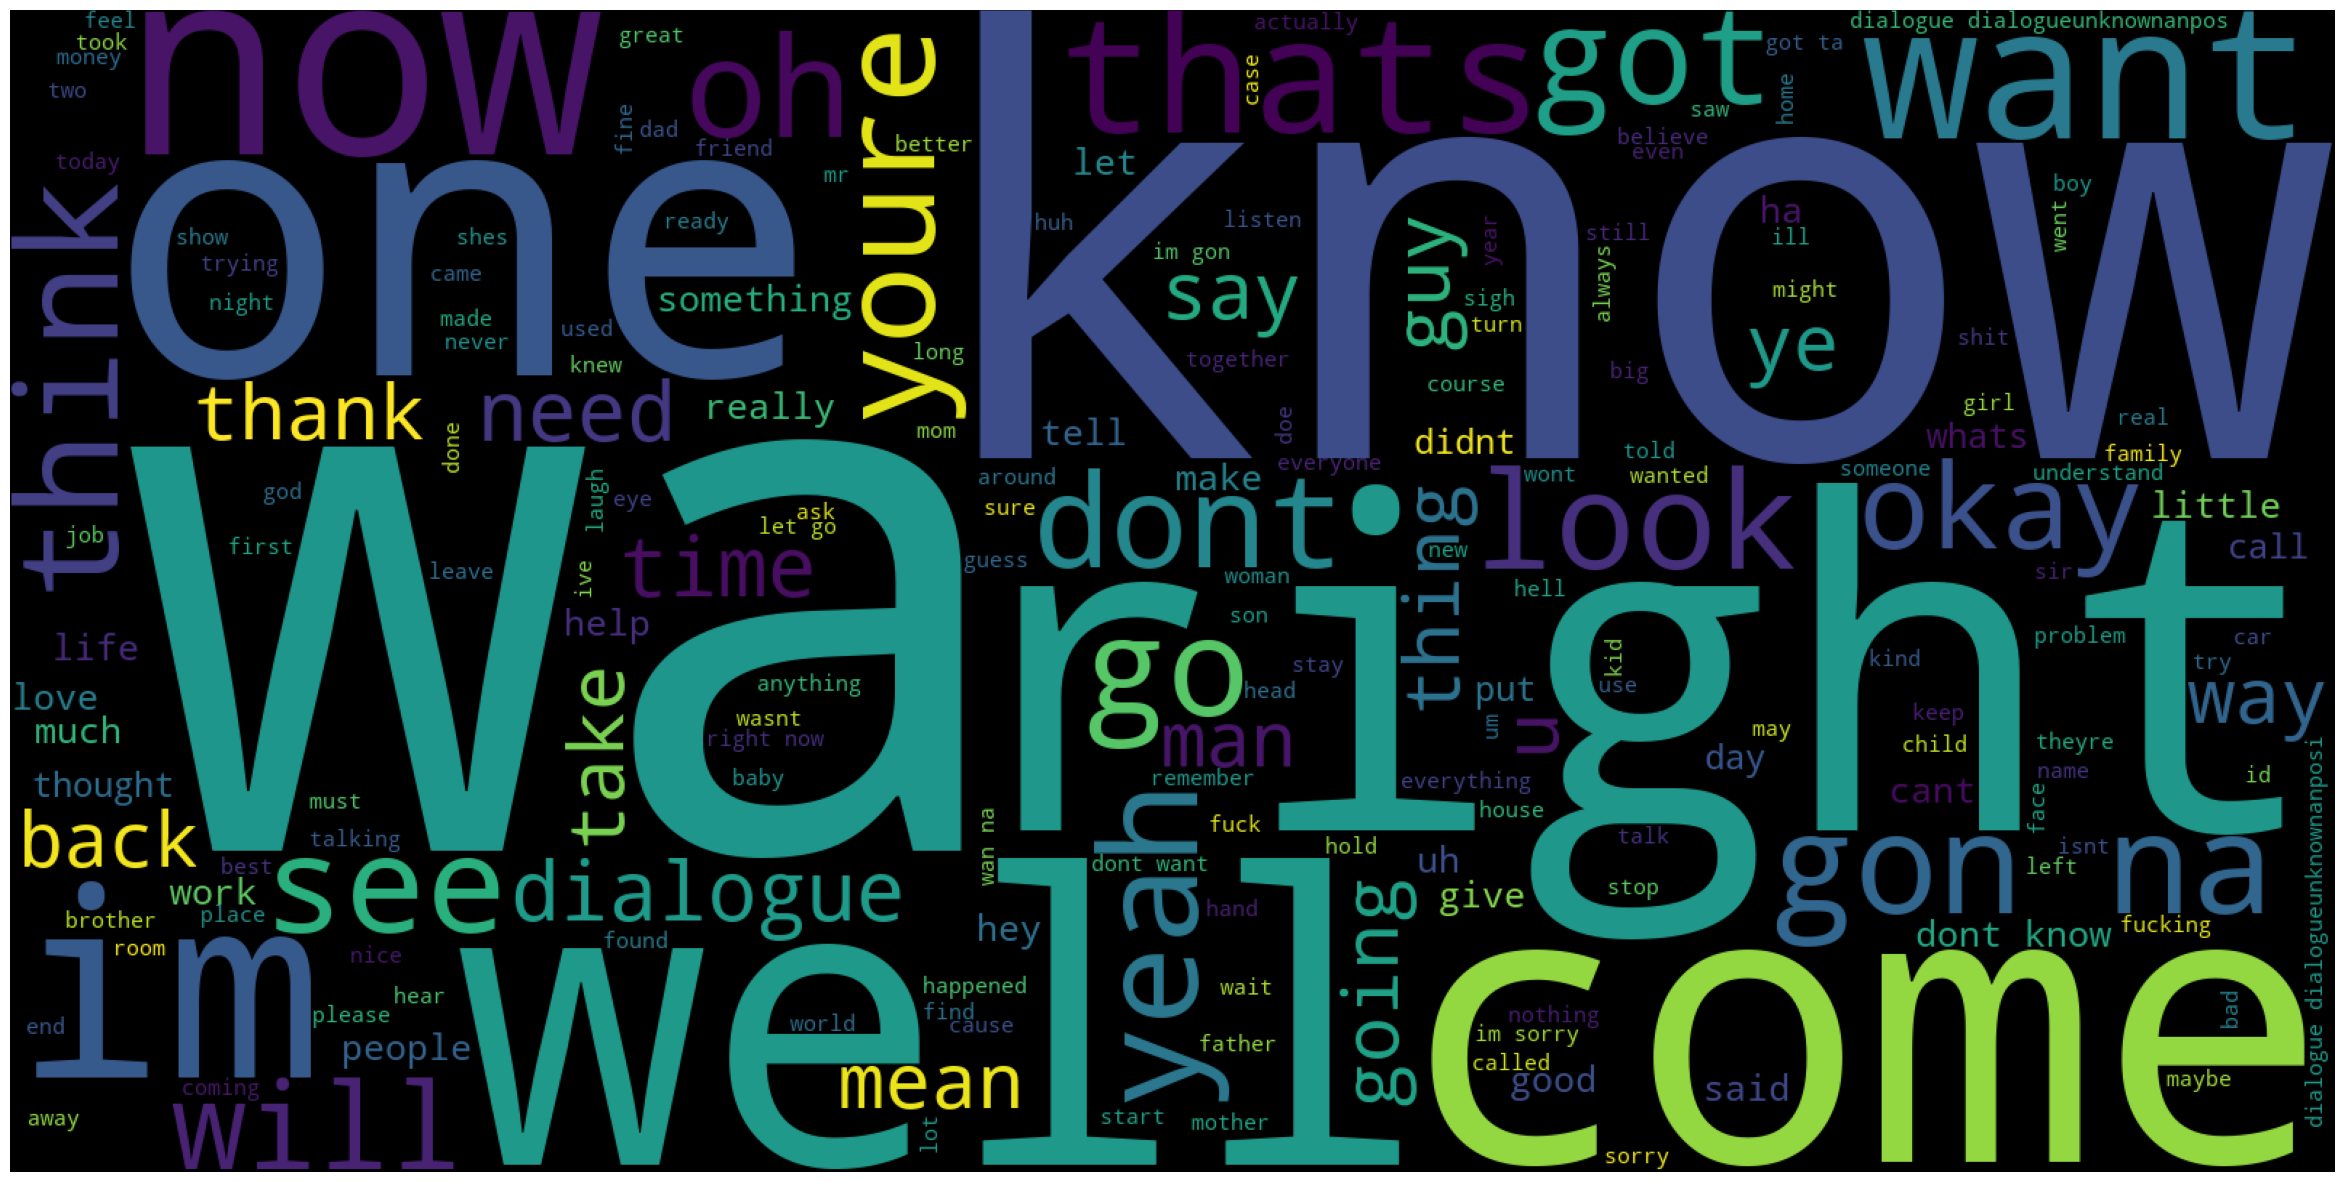

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

## **Step 13:** Generate sparse vector representations.

In [ ]:
#! pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
chunked_df

,num,name,chunk
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...
1,9251120,maybe.this.time.(2014).eng.1cd,just teach them how to swim in a sinking boat ...
2,9251120,maybe.this.time.(2014).eng.1cd,you know tep once i have enough money from wor...
3,9251120,maybe.this.time.(2014).eng.1cd,that moment i wanted to be part of your world ...
4,9251120,maybe.this.time.(2014).eng.1cd,how will the girl feel a angry b surprised or ...
...,...,...,...
262886,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,this is our dream house no this is your dream ...
262887,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,can place him at the theater at the night of t...
262888,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,and finish off alexa how are you going to live...
262889,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,know he could be rounding the call through his...


In [ ]:
def encode_text(text):
  return model.encode(text)

In [ ]:
chunked_df['embedding'] = chunked_df['chunk'].apply(encode_text)

In [ ]:
# Save DataFrame to a file (e.g., CSV)
chunked_df.to_csv('/content/drive/MyDrive/Search Engine Dataset/embedding_clean_chunk_data.csv', index=False)

In [ ]:
print(chunked_df.shape)
chunked_df

(262891, 4)


,num,name,chunk,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...,"[-0.087850414, -0.1228606, 0.027850531, -0.052..."
1,9251120,maybe.this.time.(2014).eng.1cd,just teach them how to swim in a sinking boat ...,"[-0.07370347, -0.047148414, 0.056917146, -0.01..."
2,9251120,maybe.this.time.(2014).eng.1cd,you know tep once i have enough money from wor...,"[-0.032818347, -0.066111684, 0.107563965, -0.0..."
3,9251120,maybe.this.time.(2014).eng.1cd,that moment i wanted to be part of your world ...,"[-0.099456385, -0.10122586, 0.0766382, 0.00370..."
4,9251120,maybe.this.time.(2014).eng.1cd,how will the girl feel a angry b surprised or ...,"[-0.06304503, -0.013828885, 0.028796686, -0.05..."
...,...,...,...,...
262886,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,this is our dream house no this is your dream ...,"[-0.038717896, -0.02087232, 0.047487248, -0.03..."
262887,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,can place him at the theater at the night of t...,"[-0.07199971, 0.039773677, -0.03512847, -0.056..."
262888,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,and finish off alexa how are you going to live...,"[-0.026511047, -0.0019882717, 0.0031606478, -0..."
262889,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,know he could be rounding the call through his...,"[-0.074046135, -0.01077988, -0.021401111, -0.0..."


In [ ]:
%%time
df1 = chunked_df.loc[:5000,:]
df1['embedding'] = df1['chunk'].apply(encode_text)
df1.to_csv('D:\Serarch Engin Dataset\chunks\df1.csv', index=False)
df1

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 46min 17s
Wall time: 19min 10s


,num,name,chunk,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...,"[-0.08785036, -0.122860596, 0.02785054, -0.052..."
1,9251120,maybe.this.time.(2014).eng.1cd,just teach them how to swim in a sinking boat ...,"[-0.0737034, -0.04714838, 0.05691717, -0.01799..."
2,9251120,maybe.this.time.(2014).eng.1cd,you know tep once i have enough money from wor...,"[-0.03281836, -0.06611164, 0.107563935, -0.015..."
3,9251120,maybe.this.time.(2014).eng.1cd,that moment i wanted to be part of your world ...,"[-0.09945634, -0.10122581, 0.07663813, 0.00370..."
4,9251120,maybe.this.time.(2014).eng.1cd,how will the girl feel a angry b surprised or ...,"[-0.06304495, -0.013828859, 0.028796712, -0.05..."
...,...,...,...,...
4996,9495809,csi.crime.scene.investigation.s07.e07.post.mor...,their right a interested party to question wit...,"[-0.10871841, 0.04231547, -0.05592593, -0.0690..."
4997,9495809,csi.crime.scene.investigation.s07.e07.post.mor...,this kid running at him the whole time there n...,"[0.0073058656, 0.05315214, -0.036706537, -0.00..."
4998,9495809,csi.crime.scene.investigation.s07.e07.post.mor...,card receipt how wa the sea bass and the bottl...,"[-0.023920834, 0.057851017, -0.056147188, -0.0..."
4999,9495809,csi.crime.scene.investigation.s07.e07.post.mor...,gentleman judge trueblood this inquest is conc...,"[-0.05165662, 0.007358765, -0.075549774, -0.11..."


In [ ]:
%%time
df2 = chunked_df.loc[5001:10000,:]
df2['embedding'] = df2['chunk'].apply(encode_text)
df2.to_csv('D:\Serarch Engin Dataset\chunks\df2.csv', index=False)
df2

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 47min 33s
Wall time: 17min 49s


,num,name,chunk,embedding
5001,9388900,koala.man.s01.e02.deep.pockets.(2023).eng.1cd,thank you for coming dear i saw your flyer you...,"[0.017703306, -0.16531646, -0.027737718, -0.08..."
5002,9388900,koala.man.s01.e02.deep.pockets.(2023).eng.1cd,your arse for barging in here but he been in t...,"[-0.07951579, 0.013688462, 0.0035271451, -0.09..."
5003,9388900,koala.man.s01.e02.deep.pockets.(2023).eng.1cd,gon na tell everyone that you got fingered by ...,"[-0.06138729, -0.012358298, -0.00076186884, -0..."
5004,9388900,koala.man.s01.e02.deep.pockets.(2023).eng.1cd,i specifically told you that calling the hotli...,"[-0.11873715, -0.032989465, -0.025256313, -0.0..."
5005,9388900,koala.man.s01.e02.deep.pockets.(2023).eng.1cd,alison can we please just go home no this is h...,"[-0.04591791, -0.077933736, 0.0022966582, -0.0..."
...,...,...,...,...
9996,9420613,gerda.(2021).eng.1cd,shhh everythings gon na be ok here all i can s...,"[-0.09098932, -0.045597903, 0.04048271, -0.063..."
9997,9420613,gerda.(2021).eng.1cd,shitload of cash i fled to the ocean go on tak...,"[-0.09529874, -0.0326553, 0.0019509272, -0.028..."
9998,9420613,gerda.(2021).eng.1cd,havent done anything wrong there no need to ca...,"[-0.13901302, -0.06114313, 0.08537578, -0.0121..."
9999,9420613,gerda.(2021).eng.1cd,such a whats all this for this survey wont cha...,"[0.0035083469, -0.0116994055, -0.014167912, -0..."


In [ ]:
%%time
df3 = chunked_df.loc[10001:15000,:]
df3['embedding'] = df3['chunk'].apply(encode_text)
df3.to_csv('D:\Serarch Engin Dataset\chunks\df3.csv', index=False)
df3

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 1min 37s
Wall time: 22min 32s


,num,name,chunk,embedding
10001,9420613,gerda.(2021).eng.1cd,cool huh happy birthday why are you smiling li...,"[-0.09133997, -0.016923754, 0.008777617, -0.05..."
10002,9420613,gerda.(2021).eng.1cd,do you suffer from an upset stomach once a wee...,"[0.011212737, 0.0032415935, 0.049462423, -0.05..."
10003,9420613,gerda.(2021).eng.1cd,day it time to get up come on hey wake up mom ...,"[-0.020121934, -0.019026218, 0.015145314, 0.07..."
10004,9420613,gerda.(2021).eng.1cd,to climb mountain give it a mountain to climb ...,"[-0.08086349, -0.08262446, -0.015302668, 0.015..."
10005,9407205,mamas.angel.s01.e09.episode.1.9.(2016).eng.1cd,look i dont know whether or not your son is in...,"[-0.010562951, 0.06532205, -0.03783487, -0.080..."
...,...,...,...,...
14996,9192756,madam.secretary.s04.e03.the.essentials.(2017)....,quiz time whatd you learn about morejon and th...,"[-0.02031063, 0.05116087, 0.13226661, -0.02857..."
14997,9192756,madam.secretary.s04.e03.the.essentials.(2017)....,want to spend the rest of my career fighting w...,"[-0.022183407, -0.019082503, 0.028353842, -0.0..."
14998,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,support u and become vip member to remove all ...,"[-0.024549231, -0.059173312, 0.04186974, -0.07..."
14999,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,sugar is on their way so thats why fdle is inv...,"[-0.030717358, -0.07916689, -0.028583398, -0.0..."


In [ ]:
%%time
df4 = chunked_df.loc[15001:20000,:]
df4['embedding'] = df4['chunk'].apply(encode_text)
df4.to_csv('D:\Serarch Engin Dataset\chunks\df4.csv', index=False)
df4

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 4min 21s
Wall time: 24min 12s


,num,name,chunk,embedding
15001,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,believe a guy like that wouldnt go down withou...,"[-0.01763228, -0.039764922, 0.0366395, -0.0331..."
15002,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,wa that deandre matthew mom rita im not gon na...,"[-0.06590593, -0.08678222, -0.015653402, -0.16..."
15003,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,the guy in the sugar cane field hand me that b...,"[-0.026730929, -0.046117157, -0.027434673, -0...."
15004,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,did you last see your father deandre it just m...,"[-0.057385538, -0.05545792, -0.043887865, -0.0..."
15005,9461186,the.glades.s01.e04.mucked.up.(2010).eng.1cd,unless you want to confess to something else m...,"[-0.05541821, -0.057407595, -0.008952718, -0.0..."
...,...,...,...,...
19996,9219027,the.bachelorette.s19.e07.episode.19.7.(2022).e...,be with someone like you but just never knew i...,"[-0.06780996, -0.048492752, 0.11071581, 0.0101..."
19997,9219027,the.bachelorette.s19.e07.episode.19.7.(2022).e...,tonight is meeting my mom sandy my dad joe and...,"[-0.024761165, -0.106746525, 0.07521219, -0.04..."
19998,9219027,the.bachelorette.s19.e07.episode.19.7.(2022).e...,important stuff we talked about stuff that we ...,"[-0.069768056, -0.0024065662, 0.04443393, 0.03..."
19999,9219027,the.bachelorette.s19.e07.episode.19.7.(2022).e...,i have so much to learn from him and he so hum...,"[0.022185989, -0.05901229, -0.018625602, -0.00..."


In [ ]:
%%time
df5 = chunked_df.loc[20001:25000,:]
df5['embedding'] = df5['chunk'].apply(encode_text)
df5.to_csv('D:\Serarch Engin Dataset\chunks\df5.csv', index=False)
df5

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 4min 43s
Wall time: 23min 36s


,num,name,chunk,embedding
20001,9219027,the.bachelorette.s19.e07.episode.19.7.(2022).e...,and thats honestly how i feel thats actually t...,"[0.028271621, -0.013826443, 0.047394674, -0.05..."
20002,9219027,the.bachelorette.s19.e07.episode.19.7.(2022).e...,when i wa do you have your pilot license no i ...,"[-0.034799382, -0.0133356955, 0.04284044, -0.0..."
20003,9371418,biutiful.(2010).eng.1cd,advertise your product or brand here contact w...,"[-0.04571573, -0.041420374, 0.050436176, -0.03..."
20004,9371418,biutiful.(2010).eng.1cd,lili tomorrow at okay say goodbye to lili and ...,"[-0.04457034, -0.007844054, 0.088940285, -0.06..."
20005,9371418,biutiful.(2010).eng.1cd,house this is shit it get stuck you cant open ...,"[-0.03377298, 0.0461393, -0.014580578, -0.0465..."
...,...,...,...,...
24996,9426541,snowpiercer.(2013).eng.1cd,we can keep going manually you fucking bastard...,"[0.017187072, -0.09459207, -0.04203273, -0.103..."
24997,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,support u and become vip member to remove all ...,"[-0.078780845, 0.017170561, -0.030912986, -0.0..."
24998,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,saying thing out loud or you before the bey sa...,"[0.019111421, -0.03941097, 0.0023077389, 0.010..."
24999,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,want turk job we do not buy foreign good all t...,"[-0.02885376, 0.024677295, 0.0028911277, 0.007..."


In [ ]:
%%time
df6 = chunked_df.loc[25001:30000,:]
df6['embedding'] = df6['chunk'].apply(encode_text)
df6.to_csv('D:\Serarch Engin Dataset\chunks\df6.csv', index=False)
df6

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 7min 24s
Wall time: 23min 43s


,num,name,chunk,embedding
25001,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,soon find out what we are up to what about osm...,"[-0.077916026, 0.04331468, 0.008700336, -0.044..."
25002,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,i hadnt left him alone mahloun dont worry the ...,"[-0.12253874, 0.027203718, -0.016181365, -0.02..."
25003,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,him then where did he go we are sending soldie...,"[-0.038765658, 0.040819395, -0.0068995846, -0...."
25004,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,he couldnt take me now he want to use orhan so...,"[-0.055995777, 0.039850883, -0.009444991, -0.0..."
25005,9495945,kurulus.osman.s04.e22.120.bolum.(2023).eng.1cd,then tell me my son what is happening in naima...,"[-0.043734487, 0.00983719, -0.07013171, -0.045..."
...,...,...,...,...
29996,9433325,the.dealers.(2012).eng.1cd,should be ashamed of yourselves i expected a l...,"[0.09156399, 0.11130953, -0.010925232, -0.1312..."
29997,9433325,the.dealers.(2012).eng.1cd,ran i ran with all my might today the guy ha a...,"[-0.034823705, 0.03295333, -0.015427861, -0.07..."
29998,9433325,the.dealers.(2012).eng.1cd,ill take you home ill be off too what can i sa...,"[-0.03831977, 0.037176646, -0.03558861, -0.074..."
29999,9410953,northern.exposure.s06.e18.little.italy.(1995)....,script info title default file scripttype v wr...,"[0.0069553, -0.039342992, 0.01660203, -0.00044..."


In [ ]:
%%time
df7 = chunked_df.loc[30001:35000,:]
df7['embedding'] = df7['chunk'].apply(encode_text)
df7.to_csv('D:\Serarch Engin Dataset\chunks\df7.csv', index=False)
df7

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 7min 23s
Wall time: 22min 46s


,num,name,chunk,embedding
30001,9410953,northern.exposure.s06.e18.little.italy.(1995)....,you dialogue dialogueunknownanposthank you dia...,"[-0.010664182, -0.13151085, -0.0005499344, -0...."
30002,9410953,northern.exposure.s06.e18.little.italy.(1995)....,you dialogue dialogueunknownanposhope the next...,"[-0.032919936, -0.12634397, 0.016984202, -0.02..."
30003,9410953,northern.exposure.s06.e18.little.italy.(1995)....,dialogueunknownanposcooking for you again dial...,"[0.0038857353, -0.01930478, -0.011561272, -0.0..."
30004,9410953,northern.exposure.s06.e18.little.italy.(1995)....,dialogueunknownanposfrom campania dialogue dia...,"[-0.02124645, -0.09223365, 0.01040146, -0.0454..."
30005,9410953,northern.exposure.s06.e18.little.italy.(1995)....,american dialogue dialogueunknownanpospublic t...,"[0.013800134, -0.054459043, 0.010590101, -0.00..."
...,...,...,...,...
34996,9354444,beverly.hills.90210.s03.e23.dukes.bad.boy.(199...,back in business you know im not very hungry i...,"[-0.08023407, -0.0440107, 0.0549851, -0.028691..."
34997,9383645,another.48.hrs.(1990).eng.1cd,advertise your product or brand here contact w...,"[-0.120886154, 0.01570009, -0.0076554907, -0.0..."
34998,9383645,another.48.hrs.(1990).eng.1cd,internal affair seems like im always running i...,"[-0.12925974, -0.057204902, -0.023951873, -0.0..."
34999,9383645,another.48.hrs.(1990).eng.1cd,get it you see if you dont help me out on this...,"[-0.055802554, 0.0073308013, -0.022835108, -0...."


In [ ]:
%%time
df8 = chunked_df.loc[35001:40000,:]
df8['embedding'] = df8['chunk'].apply(encode_text)
df8.to_csv('D:\Serarch Engin Dataset\chunks\df8.csv', index=False)
df8

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 53min 6s
Wall time: 19min 13s


,num,name,chunk,embedding
35001,9383645,another.48.hrs.(1990).eng.1cd,brown tape the shit aint in oh everybody tryin...,"[-0.12767124, -0.031710014, -0.011752689, -0.0..."
35002,9383645,another.48.hrs.(1990).eng.1cd,got the feeling hey vocalizing baby baby baby ...,"[-0.044829503, -0.025685444, 0.021481525, 0.00..."
35003,9383645,another.48.hrs.(1990).eng.1cd,the kingpin of the organization if i dont get ...,"[-0.10257617, -0.05469404, -0.02560911, -0.042..."
35004,9383645,another.48.hrs.(1990).eng.1cd,deal and you fucked me jack i fucked you you f...,"[-0.09332448, 0.027566604, 0.00085843576, -0.0..."
35005,9383645,another.48.hrs.(1990).eng.1cd,youre having a bad day thats it im through wit...,"[-0.06857897, -0.011724869, -0.036391348, -0.1..."
...,...,...,...,...
39996,9280021,somebody.feed.phil.s01.e03.tel.aviv.(2018).eng...,still good it amazing how just a little bit of...,"[0.0842163, 0.013719187, 0.05978718, 0.0041187..."
39997,9280021,somebody.feed.phil.s01.e03.tel.aviv.(2018).eng...,he had ever made before hug it out come live w...,"[0.042635273, 0.099069566, -0.0032905305, 0.00..."
39998,9280021,somebody.feed.phil.s01.e03.tel.aviv.(2018).eng...,the way this is smoked aubergine and raw spani...,"[-0.05774477, -0.012169484, 0.026218973, 0.037..."
39999,9280021,somebody.feed.phil.s01.e03.tel.aviv.(2018).eng...,practiced it and i can tell you that there is ...,"[-0.011318722, -0.00694577, 0.014089389, 0.015..."


In [ ]:
%%time
df9 = chunked_df.loc[40001:45000,:]
df9['embedding'] = df9['chunk'].apply(encode_text)
df9.to_csv('D:\Serarch Engin Dataset\chunks\df9.csv', index=False)
df9

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 51min 49s
Wall time: 17min 31s


,num,name,chunk,embedding
40001,9302961,studio.one.s07.e01.twelve.angry.men.(1954).eng...,announcer westinghouse westinghouse studio one...,"[0.02948878, -0.045275982, -0.051628437, -0.08..."
40002,9302961,studio.one.s07.e01.twelve.angry.men.(1954).eng...,guilty now we know where we are somebody in le...,"[-0.04774986, -0.011143044, -0.062162958, -0.0..."
40003,9302961,studio.one.s07.e01.twelve.angry.men.(1954).eng...,well i just think he wa guilty okay let get to...,"[-0.048872665, 0.023422398, -0.096060485, -0.0..."
40004,9302961,studio.one.s07.e01.twelve.angry.men.(1954).eng...,him i told him right out im gon na make a man ...,"[-0.04604895, -0.0019554447, -0.033439282, -0...."
40005,9302961,studio.one.s07.e01.twelve.angry.men.(1954).eng...,you everyone connected with the case ha identi...,"[-0.06539693, 0.030192725, -0.027951417, -0.06..."
...,...,...,...,...
44996,9351881,american.horror.story.s08.e01.the.end.(2018).e...,find the evening wear on the left side of the ...,"[-0.053076528, -0.06677885, 0.072744116, 0.004..."
44997,9351881,american.horror.story.s08.e01.the.end.(2018).e...,outpost have been overrun we are the last vest...,"[-0.014095599, 0.0020872878, 0.030905597, -0.0..."
44998,9351881,american.horror.story.s08.e01.the.end.(2018).e...,off hand are you saying he deserved this im sa...,"[-0.0078071556, -0.0237921, 0.02469237, -0.044..."
44999,9351881,american.horror.story.s08.e01.the.end.(2018).e...,and no one ever came but nuclear winter came a...,"[-0.015044402, 0.022817038, -0.03802708, 0.085..."


In [ ]:
%%time
df10 = chunked_df.loc[45001:50000,:]
df10['embedding'] = df10['chunk'].apply(encode_text)
df10.to_csv('D:\Serarch Engin Dataset\chunks\df10.csv', index=False)
df10

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 49min 56s
Wall time: 17min 9s


,num,name,chunk,embedding
45001,9407615,space.pirate.captain.harlock.s01.e31.the.arcad...,script info title default file scripttype v wr...,"[0.005583127, -0.041494165, 0.018668152, -0.03..."
45002,9407615,space.pirate.captain.harlock.s01.e31.the.arcad...,given our livesi dialogue dialogueunknownanpos...,"[0.017147807, -0.008030706, 0.011221757, -0.01..."
45003,9407615,space.pirate.captain.harlock.s01.e31.the.arcad...,theyre under attack dialogue dialogueunknownan...,"[-0.041677214, -0.1133235, 0.07467202, -0.0427..."
45004,9407615,space.pirate.captain.harlock.s01.e31.the.arcad...,dialogueunknownanposdarling dialogue dialogueu...,"[0.017992467, -0.016271198, 0.032955512, 0.000..."
45005,9407615,space.pirate.captain.harlock.s01.e31.the.arcad...,design dialogue dialogueunknownanposkazuko kom...,"[-0.04389202, -0.057223726, -0.0028465937, -0...."
...,...,...,...,...
49996,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,a breast his wife lost a breast and now hell f...,"[-0.048384294, -0.009986868, 0.0146220485, -0...."
49997,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,get dressed no no he got and get dressed no no...,"[-0.048322238, 0.018039448, 0.03942664, -0.091..."
49998,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,clifford i wan na speak to president mcdonnell...,"[-0.014442777, -0.019549908, -0.033744942, -0...."
49999,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,too what make you think i wa sitting there too...,"[-0.06585827, -0.07085723, 0.037503637, -0.055..."


In [ ]:
%%time
df11 = chunked_df.loc[50001:55000,:]
df11['embedding'] = df11['chunk'].apply(encode_text)
df11.to_csv('D:\Serarch Engin Dataset\chunks\df11.csv', index=False)
df11

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 57s
Wall time: 19min 18s


,num,name,chunk,embedding
50001,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,union wa there to move him and he wa forced to...,"[-0.052499823, 0.054057088, -0.046699587, -0.0..."
50002,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,update among other thing ha discovered weekend...,"[-0.0055023655, 0.06676496, 0.05195223, 0.0591..."
50003,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,laughter botanist have discovered a unique spe...,"[-0.024008075, -6.807688e-05, 0.0010389965, 0...."
50004,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,i understand today youre going to talk about n...,"[0.03031251, -0.0859621, -0.02720874, 0.045020..."
50005,9210733,saturday.night.live.s05.e05.bea.arthurthe.roch...,what audience laugh and groan let get one more...,"[0.0068729357, -0.1158661, -0.0008197786, -0.0..."
...,...,...,...,...
54996,9508077,dr.stone.s03.e02.desire.is.noble.(2023).eng.1cd,dialogue maingeni could eat it forever dialogu...,"[0.02829408, -0.016450621, 0.029003559, -0.041..."
54997,9508077,dr.stone.s03.e02.desire.is.noble.(2023).eng.1cd,dialogue mainkasekidont underestimate a crafts...,"[-0.060448986, -0.040438637, 0.02145211, -0.00..."
54998,9508077,dr.stone.s03.e02.desire.is.noble.(2023).eng.1cd,new world dialogue mainfrancoisyou seem to mis...,"[-0.009036175, 0.0006454454, 0.031654157, -0.1..."
54999,9230115,parallel.world.pharmacy.s01.e09.the.story.of.a...,script info title english u original script ka...,"[-0.014985277, -0.04541084, 0.059004467, -0.05..."


In [ ]:
%%time
df12 = chunked_df.loc[55001:60000,:]
df12['embedding'] = df12['chunk'].apply(encode_text)
df12.to_csv('D:\Serarch Engin Dataset\chunks\df12.csv', index=False)
df12

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 59min 25s
Wall time: 21min 49s


,num,name,chunk,embedding
55001,9230115,parallel.world.pharmacy.s01.e09.the.story.of.a...,majesty i dialogue defaultlisabeth iiit is wel...,"[-0.0030131224, 0.047378756, 0.026523469, -0.0..."
55002,9230115,parallel.world.pharmacy.s01.e09.the.story.of.a...,dialogue defaultbrunothough i have only read n...,"[0.08361982, -0.035127465, 0.013421735, -0.045..."
55003,9230115,parallel.world.pharmacy.s01.e09.the.story.of.a...,make the arrangement at once dialogue defaults...,"[0.0065275626, -0.052244335, 0.022029651, -0.0..."
55004,9230115,parallel.world.pharmacy.s01.e09.the.story.of.a...,squander the good fortune nof having him in th...,"[0.04515988, -0.061279938, 0.034155827, -0.023..."
55005,9509028,prisoner.zero.s01.e03.toybox.(2016).eng.1cd,previously on prisoner zero you can not go low...,"[-0.02782689, -0.008609016, -0.04816043, -0.08..."
...,...,...,...,...
59996,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,i missed you i missed you i i missed you i m i...,"[-0.13365473, -0.09724123, -0.013550469, 0.064..."
59997,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,did i took the i did i took the j i did i took...,"[-0.04702434, -0.037723262, 0.016087089, -0.01..."
59998,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,we well thats ridiculous we c well thats ridic...,"[-0.062174413, -0.042988505, -0.029982058, 0.0..."
59999,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,you sent me away i d you sent me away i did yo...,"[0.0021689895, -0.0534128, 0.047394786, 0.0478..."


In [ ]:
%%time
df13 = chunked_df.loc[60001:65000,:]
df13['embedding'] = df13['chunk'].apply(encode_text)
df13.to_csv('D:\Serarch Engin Dataset\chunks\df13.csv', index=False)
df13

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 5min 45s
Wall time: 24min 36s


,num,name,chunk,embedding
60001,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,here and my business my business is here and m...,"[0.0031890797, -0.025919646, -0.004829472, -0...."
60002,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,everything youd expect me to drop everything a...,"[-0.01763789, -0.012729098, 0.04749893, -0.019..."
60003,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,i gave up a promotion for you thing are differ...,"[-0.08584653, -0.012905057, 0.0074577774, -0.0..."
60004,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,going to have yes if were going to have a yes ...,"[-0.047681484, -0.027576609, 0.061033413, -0.0..."
60005,9457547,archie.bunkers.place.s03.e01.billie.(1981).eng...,well what are we going to do tha well what are...,"[-0.05938506, -0.05222021, 0.03527953, -0.0385..."
...,...,...,...,...
64996,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,mindful slow slow watch your step it is a trip...,"[-0.118910976, 0.0040563745, 0.015835581, -0.0..."
64997,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,more crossing left paul yeah seth wasnt too ba...,"[-0.0141233, -0.06748997, 0.010323267, 0.03873..."
64998,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,deep in the bottom of your foot like a faraway...,"[-0.09590861, -0.041324984, 0.052175324, -0.06..."
64999,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,elevation change amber wow alpha team is faced...,"[-0.07778696, -0.014396, 0.05567441, -0.000364..."


In [ ]:
%%time
df14 = chunked_df.loc[65001:70000,:]
df14['embedding'] = df14['chunk'].apply(encode_text)
df14.to_csv('D:\Serarch Engin Dataset\chunks\df14.csv', index=False)
df14

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 11min 9s
Wall time: 23min 48s


,num,name,chunk,embedding
65001,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,amber holy shit jill wheres them boy where are...,"[-0.103302434, -0.04812584, 0.025634995, -0.05..."
65002,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,come on paul let go paul seth paul im beat nic...,"[-0.06688619, -0.060566124, 0.027688006, -0.05..."
65003,9460341,outlast.s01.e08.the.final.straw.(2023).eng.1cd,but the path to success involves the ability a...,"[-0.01667089, -0.01765444, -0.033351287, -0.06..."
65004,9302097,to.your.eternity.s02.e03.the.awaited.(2022).en...,script info title english u original script nh...,"[-0.0047153244, -0.023632973, 0.07150436, -0.0..."
65005,9302097,to.your.eternity.s02.e03.the.awaited.(2022).en...,doing enough dialogue mainkahakuwhich is why w...,"[0.025993997, -0.03887802, -0.023316799, -0.10..."
...,...,...,...,...
69996,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,met you like the rainy season in my daily life...,"[-0.03148003, 0.023120623, 0.030960802, -0.007..."
69997,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,fall for joon young what if you are continuous...,"[-0.043620974, 0.012825872, 0.014455802, -0.01..."
69998,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,time wow father are you going to be like this ...,"[0.031283826, 0.021580268, -0.00037762895, -0...."
69999,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,i will be having a concert today i got a reall...,"[-0.030068377, 0.029462952, -0.006431138, -0.0..."


In [ ]:
%%time
df15 = chunked_df.loc[70001:75000,:]
df15['embedding'] = df15['chunk'].apply(encode_text)
df15.to_csv('D:\Serarch Engin Dataset\chunks\df15.csv', index=False)
df15

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 9min 50s
Wall time: 23min 56s


,num,name,chunk,embedding
70001,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,is just a picture in my head there is just a p...,"[-0.051090855, 0.06130239, -0.03492483, -0.037..."
70002,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,youve ever done here have some water here you ...,"[-0.027971575, -0.023763174, 0.11558215, 0.046..."
70003,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,no pd no eul stole her friend boyfriend sin jo...,"[-0.03770938, 0.03144124, 0.030270534, -0.0332..."
70004,9380843,uncontrollably.fond.s01.e05.confession.(2016)....,leave me you are the only one for me dont go i...,"[-0.061431576, -0.010611335, 0.09861367, 0.000..."
70005,9318292,islands.of.creation.(2015).eng.1cd,today the earth is home to over million specie...,"[-0.0980299, 0.017220713, -0.022269482, 0.0438..."
...,...,...,...,...
74996,9439868,allo.allo.s05.e01.desperate.doings.in.the.dung...,a heinrich himmler head of the gestapo me look...,"[-0.010121422, 0.07079474, -0.003969054, -0.04..."
74997,9439868,allo.allo.s05.e01.desperate.doings.in.the.dung...,herr flick what kept you and why is that frenc...,"[-0.07074443, 0.052788675, -0.004600055, -0.04..."
74998,9249055,sokado.ggumgyeol.s01.e09.episode.1.9.(2021).en...,watch any video online with opensubtitles free...,"[-0.008239647, -0.04772643, 0.053254753, -0.01..."
74999,9249055,sokado.ggumgyeol.s01.e09.episode.1.9.(2021).en...,long at the farmer market nor should you have ...,"[-0.012313252, -0.06749253, 0.061328493, 0.002..."


In [ ]:
%%time
df16 = chunked_df.loc[75001:80000,:]
df16['embedding'] = df16['chunk'].apply(encode_text)
df16.to_csv('D:\Serarch Engin Dataset\chunks\df16.csv', index=False)
df16

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 7min 8s
Wall time: 28min 14s


,num,name,chunk,embedding
75001,9249055,sokado.ggumgyeol.s01.e09.episode.1.9.(2021).en...,is the first and last time im never going to q...,"[-0.018783884, 0.009509419, 0.014433942, -0.03..."
75002,9249055,sokado.ggumgyeol.s01.e09.episode.1.9.(2021).en...,it wa all needle arent you tired not at all i ...,"[-0.064150326, -0.06357644, -0.021279396, 0.02..."
75003,9249055,sokado.ggumgyeol.s01.e09.episode.1.9.(2021).en...,go you should go ahead im not a widow how can ...,"[-0.050599627, -0.011813918, 0.04223405, 0.014..."
75004,9249055,sokado.ggumgyeol.s01.e09.episode.1.9.(2021).en...,see then ill use the bathroom first all right ...,"[-0.014841293, -0.120957956, 0.009223209, -0.0..."
75005,9420933,akai.satsui.(1964).eng.1cd,a nikkatsu production advertise your product o...,"[-0.06054428, 0.046436213, 0.014821368, -0.060..."
...,...,...,...,...
79996,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,and today i want you to play with that attitud...,"[-0.017938124, -0.009011402, 0.016301729, -0.1..."
79997,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,after defeat obviously the energy drop belief ...,"[0.060675863, 0.061644718, 0.040188123, -0.005..."
79998,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,table behind manchester united since the inter...,"[0.009165023, 0.029448697, -0.024484212, -0.04..."
79999,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,a single player ha to do a job with eddie i sa...,"[0.024045797, -0.02176545, -0.012348262, -0.05..."


In [ ]:
%%time
df17 = chunked_df.loc[80001:85000,:]
df17['embedding'] = df17['chunk'].apply(encode_text)
df17.to_csv('D:\Serarch Engin Dataset\chunks\df17.csv', index=False)
df17

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 9min 29s
Wall time: 25min 15s


,num,name,chunk,embedding
80001,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,you want to be taken seriously a a team thats ...,"[-0.0652011, 0.007132379, 0.053191636, -0.0726..."
80002,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,it is chelsea arsenal hubbub okay what happene...,"[0.04604673, 0.026566137, -0.0045154165, -0.10..."
80003,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,ian wright you know laughing ian wright very p...,"[0.028317804, 0.0082285525, -0.05026993, -0.06..."
80004,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,thats it yeah narrator mo is currently observi...,"[-0.02738703, -0.034041088, 0.035601657, -0.02..."
80005,9210034,all.or.nothing.arsenal.s01.e07.a.lightbulb.mom...,arsenal goal commentator xhaka to elneny elnen...,"[-0.030895386, 0.03493143, -0.01969543, -0.156..."
...,...,...,...,...
84996,9301450,performance.broken.glass.(1996).eng.1cd,you live you draw your card face down you turn...,"[2.177996e-05, 0.048127584, 0.007966081, 0.013..."
84997,9301450,performance.broken.glass.(1996).eng.1cd,really amazing is you cant find anybody who pe...,"[0.040915944, 0.0091048, 0.040211737, 0.033170..."
84998,9274633,scrubs.s07.e10.my.waste.of.time.(2008).eng.1cd,time were changing dr kelso had quit so the bo...,"[-0.06465157, 0.0064869975, -0.007251797, -0.0..."
84999,9274633,scrubs.s07.e10.my.waste.of.time.(2008).eng.1cd,look i dont even care it not like anyone notic...,"[-0.10344171, -0.052080948, 0.04000689, 0.0070..."


In [ ]:
%%time
df18 = chunked_df.loc[85001:90000,:]
df18['embedding'] = df18['chunk'].apply(encode_text)
df18.to_csv('D:\Serarch Engin Dataset\chunks\df18.csv', index=False)
df18

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 9min 55s
Wall time: 24min 47s


,num,name,chunk,embedding
85001,9274633,scrubs.s07.e10.my.waste.of.time.(2008).eng.1cd,morgue today so id like to introduce our new m...,"[-0.029002357, -0.038067706, 0.01080143, -0.05..."
85002,9274633,scrubs.s07.e10.my.waste.of.time.(2008).eng.1cd,trust is a dictatorship masquerading a a democ...,"[-0.10239069, -0.11636517, -0.049649253, 0.063..."
85003,9274633,scrubs.s07.e10.my.waste.of.time.(2008).eng.1cd,janitor only in their sitcom legal custodian g...,"[-0.09609466, -0.046981554, -0.015486003, -0.0..."
85004,9274633,scrubs.s07.e10.my.waste.of.time.(2008).eng.1cd,you can see sam is jonesing for his afternoon ...,"[-0.07136514, -0.042197984, -0.0020639189, -0...."
85005,9260677,idolish7.s01.e12.5.ri.to.2.ri.(2018).eng.1cd,script info title english u original script ba...,"[0.011024785, -0.023809887, 0.07360228, -0.078..."
...,...,...,...,...
89996,9313955,detective.conan.the.bride.of.halloween.(2022)....,floor dialogue defaultalright then let go upst...,"[0.03705088, -0.05575746, -0.020448918, 0.0089..."
89997,9313955,detective.conan.the.bride.of.halloween.(2022)....,all fine dont worry about u dialogue defaultth...,"[0.048988145, -0.11129162, -0.014281821, -0.01..."
89998,9313955,detective.conan.the.bride.of.halloween.(2022)....,the result well develop a neutralizer for it d...,"[-0.020104593, -0.030073728, -0.013296681, -0...."
89999,9313955,detective.conan.the.bride.of.halloween.(2022)....,him globally dialogue defaultand the base of h...,"[-0.0070258398, 0.0017058948, -0.085969076, -0..."


In [ ]:
%%time
df19 = chunked_df.loc[90001:95000,:]
df19['embedding'] = tqdm(df19['chunk'].apply(encode_text))
df19.to_csv('D:\Serarch Engin Dataset\chunks\df19.csv', index=False)
df19

100%|██████████| 5000/5000 [00:00<?, ?it/s]
<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 50min 54s
Wall time: 21min 6s


,num,name,chunk,embedding
90001,9313955,detective.conan.the.bride.of.halloween.(2022)....,see dialogue defaultif it ha come to this imnc...,"[0.03228345, -0.054971028, -0.051057953, -0.06..."
90002,9313955,detective.conan.the.bride.of.halloween.(2022)....,defaultand decided to make our move there dial...,"[0.01274983, 5.487407e-05, -0.02361516, -0.057..."
90003,9313955,detective.conan.the.bride.of.halloween.(2022)....,need to find another place dialogue defaultwhy...,"[-0.00089819793, -0.03482269, -0.040788922, -0..."
90004,9313955,detective.conan.the.bride.of.halloween.(2022)....,front of me when dialogue defaultthe explosion...,"[-0.012790599, 0.01712093, 0.039972242, -0.014..."
90005,9313955,detective.conan.the.bride.of.halloween.(2022)....,dialogue defaultwait how did the perpetrator k...,"[-0.02763673, 0.005859966, -0.015893377, 0.003..."
...,...,...,...,...
94996,9521555,guilt.s03.e03.episode.3.3.(2022).eng.1cd,just a quick a we can hey im coming to see you...,"[-0.103776194, -0.0906938, 0.0008086434, -0.07..."
94997,9521555,guilt.s03.e03.episode.3.3.(2022).eng.1cd,most is possibility if you have a way out then...,"[0.03957502, -0.021065427, -0.07592777, -0.068..."
94998,9521555,guilt.s03.e03.episode.3.3.(2022).eng.1cd,no paperwork youre flying back tonight the oth...,"[0.03323783, 0.05173712, 0.034494907, 0.032099..."
94999,9521555,guilt.s03.e03.episode.3.3.(2022).eng.1cd,that at the start when i had nothing to lose i...,"[-0.010576521, 0.007920125, 0.018206118, 0.021..."


In [ ]:
from tqdm import tqdm

In [ ]:
%%time
df20 = chunked_df.loc[95001:100000,:]
df20['embedding'] = tqdm(df20['chunk'].apply(encode_text))
df20.to_csv('D:\Serarch Engin Dataset\chunks\df20.csv', index=False)
df20

100%|██████████| 5000/5000 [00:00<00:00, 312499.37it/s]
<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 47min 52s
Wall time: 20min 3s


,num,name,chunk,embedding
95001,9341684,army.wives.s02.e07.uncharted.territory.(2008)....,roxy previously on army wife im going to rebui...,"[-0.014264796, -0.0116390595, 0.057622787, 0.0..."
95002,9341684,army.wives.s02.e07.uncharted.territory.(2008)....,roxy sigh doe it look like were fighting no go...,"[0.0077978093, -0.07450876, -0.011235198, -0.0..."
95003,9341684,army.wives.s02.e07.uncharted.territory.(2008)....,dont tell me youre selling your motorcycle goo...,"[-0.029212316, -0.044211242, 0.097296596, -0.0..."
95004,9341684,army.wives.s02.e07.uncharted.territory.(2008)....,very proud of what you did in iraq but that do...,"[-0.0410808, -0.014389539, 0.0682891, -0.05302..."
95005,9341684,army.wives.s02.e07.uncharted.territory.(2008)....,me for our anniversary and i loved it but i ke...,"[-0.044383727, -0.010495638, 0.06961323, -0.04..."
...,...,...,...,...
99996,9183130,the.great.food.truck.race.s02.e01.what.happens...,no egg thats right this is a fullon gourmet ve...,"[-0.04803749, -0.037433255, -0.012477119, -0.0..."
99997,9183130,the.great.food.truck.race.s02.e01.what.happens...,irreverent were rude were all those thing that...,"[-0.007799811, -0.048511617, 0.08977245, 0.006..."
99998,9183130,the.great.food.truck.race.s02.e01.what.happens...,wisely every penny count so with that on your ...,"[-0.05301097, -0.078352734, 0.044911295, -0.00..."
99999,9183130,the.great.food.truck.race.s02.e01.what.happens...,weare wewere not even halfway to vega i mean w...,"[-0.08352504, -0.008164635, 0.019146318, -0.00..."


In [ ]:
%%time
df21 = chunked_df.loc[100001:105000,:]
df21['embedding'] = df21['chunk'].apply(encode_text)
df21.to_csv('D:\Serarch Engin Dataset\chunks\df21.csv', index=False)
df21

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 45min 9s
Wall time: 20min 34s


,num,name,chunk,embedding
100001,9183130,the.great.food.truck.race.s02.e01.what.happens...,latin festival thats gon na be probably our nu...,"[0.011009472, -0.10264885, 0.036624607, -0.038..."
100002,9183130,the.great.food.truck.race.s02.e01.what.happens...,place wa this the trick plan that you had so w...,"[-0.059744783, -0.031312153, 0.047558434, 0.00..."
100003,9183130,the.great.food.truck.race.s02.e01.what.happens...,hour and you know we justwe need something to ...,"[-0.030828988, -0.07344023, 0.049474213, 0.004..."
100004,9183130,the.great.food.truck.race.s02.e01.what.happens...,tater tot for the kiddo we got burger we got h...,"[-0.009331576, -0.077349, 0.011523937, -0.0055..."
100005,9183130,the.great.food.truck.race.s02.e01.what.happens...,to look at the menu jack you got ta pay attent...,"[-0.021977892, -0.1023957, -0.00057140307, -0...."
...,...,...,...,...
104996,9283497,paradise.for.three.(1938).eng.1cd,dinner oh yes thatll be a pleasure bartender y...,"[-0.07184082, 0.007225148, 0.020277483, -0.022..."
104997,9283497,paradise.for.three.(1938).eng.1cd,have been requested by the management to prese...,"[0.008461849, 0.003232467, 0.003933723, 0.0240..."
104998,9283497,paradise.for.three.(1938).eng.1cd,shape so they look like potato then the chef w...,"[-0.014887107, -0.073056675, -0.018258002, 0.0..."
104999,9283497,paradise.for.three.(1938).eng.1cd,well well here to our vacation may we all get ...,"[-0.012700834, -0.011283403, 0.044779718, 0.03..."


In [ ]:
%%time
df22 = chunked_df.loc[105001:110000,:]
df22['embedding'] = df22['chunk'].apply(encode_text)
df22.to_csv('D:\Serarch Engin Dataset\chunks\df22.csv', index=False)
df22

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 16min 26s
Wall time: 33min 19s


,num,name,chunk,embedding
105001,9283497,paradise.for.three.(1938).eng.1cd,short is the road into eternity franz kobler l...,"[-0.023527311, -0.03607631, 0.01187769, -0.021..."
105002,9283497,paradise.for.three.(1938).eng.1cd,edward oh i hope im not tiring you irene with ...,"[-0.043353904, 0.0050269165, 0.041777622, -0.0..."
105003,9283497,paradise.for.three.(1938).eng.1cd,the other side yes and then if it match well k...,"[-0.010486214, -0.0054217023, 0.00937108, 0.02..."
105004,9283497,paradise.for.three.(1938).eng.1cd,oh poor baby oh it stifling in here would you ...,"[-0.03506065, 0.0069843475, 0.011694321, -0.00..."
105005,9283497,paradise.for.three.(1938).eng.1cd,fool of myself father what happened well it sc...,"[0.0002477419, 0.010581768, -0.0064191725, 0.0..."
...,...,...,...,...
109996,9378358,phrogging.hider.in.my.house.s01.e06.deep.denia...,but they dont find anyone up there anyone who ...,"[-0.044709995, -0.0039423555, -0.056499016, -0..."
109997,9378358,phrogging.hider.in.my.house.s01.e06.deep.denia...,looking at the obvious thing nothing that i wo...,"[-0.016535556, 0.05852722, -0.0014856685, 0.05..."
109998,9285630,prendre.le.large.(2017).eng.1cd,watch any video online with opensubtitles free...,"[-0.06670418, -0.029622795, -7.678076e-05, -0...."
109999,9285630,prendre.le.large.(2017).eng.1cd,here driving and swimming thats six thing thos...,"[0.0145688625, -0.015644476, 0.012619435, -0.0..."


In [ ]:
%%time
df23 = chunked_df.loc[110001:115000,:]
df23['embedding'] = df23['chunk'].apply(encode_text)
df23.to_csv('D:\Serarch Engin Dataset\chunks\df23.csv', index=False)
df23

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 51min 27s
Wall time: 22min 51s


,num,name,chunk,embedding
110001,9285630,prendre.le.large.(2017).eng.1cd,cab follow me please maam hop in hop in maam y...,"[-0.02851452, -0.021616349, -0.003272463, -0.0..."
110002,9285630,prendre.le.large.(2017).eng.1cd,it over there maam come with me no it over the...,"[-0.03316373, -0.034431417, 0.0016089501, -0.0..."
110003,9285630,prendre.le.large.(2017).eng.1cd,the money shes earning she could feed you for ...,"[0.004595619, 0.021166528, -0.017316272, 0.016..."
110004,9285630,prendre.le.large.(2017).eng.1cd,situation i have bill to pay ask someone to wi...,"[-0.013867776, 0.012881539, 0.009908792, 0.003..."
110005,9285630,prendre.le.large.(2017).eng.1cd,like hell i got burnt this morning i didnt lik...,"[-0.0048337905, -0.024371633, 0.059529003, -0...."
...,...,...,...,...
114996,9447123,csi.cyber.s01.e09.l0m1s.(2015).eng.1cd,reputation matter dialogue dialogueunknownanpo...,"[-0.1007551, -0.027929945, -0.002056255, -0.08..."
114997,9447123,csi.cyber.s01.e09.l0m1s.(2015).eng.1cd,a big difference dialogue dialogueunknownanpos...,"[-0.009771193, -0.041202564, -0.012998965, -0...."
114998,9447123,csi.cyber.s01.e09.l0m1s.(2015).eng.1cd,shes innocent dialogue dialogueunknownanposand...,"[-0.0421427, -0.05541248, 0.034484684, -0.0096..."
114999,9447123,csi.cyber.s01.e09.l0m1s.(2015).eng.1cd,job dialogue dialogueunknownanposso did i dial...,"[-0.015474666, -0.038306896, 0.03157835, -0.01..."


In [ ]:
%%time
df24 = chunked_df.loc[115001:120000,:]
df24['embedding'] = df24['chunk'].apply(encode_text)
df24.to_csv('D:\Serarch Engin Dataset\chunks\df24.csv', index=False)
df24

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 45min 5s
Wall time: 17min 2s


,num,name,chunk,embedding
115001,9481335,the.americans.s05.e07.the.committee.on.human.r...,script info title default file scripttype v wr...,"[-0.006804117, -0.061077528, 0.008440235, 0.00..."
115002,9481335,the.americans.s05.e07.the.committee.on.human.r...,i think thats courage dialogue dialogueunknown...,"[-0.057409395, -0.022542143, 0.010557148, 0.00..."
115003,9481335,the.americans.s05.e07.the.committee.on.human.r...,topeka dialogue dialogueunknownanposno dialogu...,"[0.023105875, -0.06752419, 0.035779126, -0.044..."
115004,9481335,the.americans.s05.e07.the.committee.on.human.r...,okay dialogue dialogueunknownanposwere um maki...,"[-0.02524072, -0.07286592, 0.028622482, -0.013..."
115005,9481335,the.americans.s05.e07.the.committee.on.human.r...,that dialogue dialogueunknownanposnot great di...,"[-0.07556194, -0.10403648, 0.053318206, -0.047..."
...,...,...,...,...
119996,9509064,martin.(hache).(1997).eng.1cd,know he your friend but there not a chance we ...,"[-0.07959604, -0.005229483, 0.006610323, -0.06..."
119997,9509064,martin.(hache).(1997).eng.1cd,dont have to think where i am i can do anythin...,"[-0.00764161, -0.03918818, -0.028820995, 0.008..."
119998,9509064,martin.(hache).(1997).eng.1cd,i cant work with someone i cant trust that ha ...,"[-0.097421326, -0.03921281, -0.002316757, -0.0..."
119999,9362160,below.deck.s10.e05.his.watch.has.ended.(2022)....,previously on below deck who on service right ...,"[-0.045143083, -0.08860744, 0.085293464, -0.01..."


In [ ]:
%%time
df25 = chunked_df.loc[120001:125000,:]
df25['embedding'] = df25['chunk'].apply(encode_text)
df25.to_csv('D:\Serarch Engin Dataset\chunks\df25.csv', index=False)
df25

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 45min 24s
Wall time: 16min 48s


,num,name,chunk,embedding
120001,9362160,below.deck.s10.e05.his.watch.has.ended.(2022)....,shower it that how thats supposed to go oh hey...,"[-0.0196589, -0.029956695, 0.047752224, -0.023..."
120002,9362160,below.deck.s10.e05.his.watch.has.ended.(2022)....,to do than hang out here on the aft deck no th...,"[-0.035152074, -0.08016936, 0.055458505, 0.005..."
120003,9362160,below.deck.s10.e05.his.watch.has.ended.(2022)....,what it like and one day they will be in comma...,"[-0.07213533, 0.023598872, 0.07308193, -0.0102..."
120004,9362160,below.deck.s10.e05.his.watch.has.ended.(2022)....,golfer who ha won the woman u open dinner dinn...,"[0.049707253, -0.018102616, 0.026165359, -0.00..."
120005,9362160,below.deck.s10.e05.his.watch.has.ended.(2022)....,like to read thing that like in the morning th...,"[-0.033516858, -0.044649836, 0.016748834, -0.0..."
...,...,...,...,...
124996,9422339,the.flintstones.s03.e16.the.kissing.burglar.(1...,of history someday maybe fred will win the fig...,"[-0.008437253, 0.038961627, -0.000784749, -0.0..."
124997,9304136,star.trek.the.next.generation.s05.e17.the.outc...,picard captain log stardate we have been conta...,"[-0.02983415, -0.015768562, 0.020897789, 0.052..."
124998,9304136,star.trek.the.next.generation.s05.e17.the.outc...,to rescue our crew you cant pilot a shuttle yo...,"[-0.03083977, -0.048075996, -0.032569226, 0.01..."
124999,9304136,star.trek.the.next.generation.s05.e17.the.outc...,snail and puppy dog tail you have a dog tail t...,"[0.046119172, -0.054681815, 0.056307677, 0.055..."


In [ ]:
%%time
df26 = chunked_df.loc[125001:130000,:]
df26['embedding'] = df26['chunk'].apply(encode_text)
df26.to_csv('D:\Serarch Engin Dataset\chunks\df26.csv', index=False)
df26

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 49min 34s
Wall time: 19min 2s


,num,name,chunk,embedding
125001,9304136,star.trek.the.next.generation.s05.e17.the.outc...,protrusion from the null pocket and shut it do...,"[-0.010802717, 0.0052474807, -0.0010620035, 0...."
125002,9304136,star.trek.the.next.generation.s05.e17.the.outc...,element of gender eliminated can they be accep...,"[0.011738937, 0.07316272, -0.085430585, 0.0758..."
125003,9304136,star.trek.the.next.generation.s05.e17.the.outc...,read me sensor beeping getting sensor reading ...,"[0.014162524, -0.009805377, 0.05911895, 0.0243..."
125004,9304136,star.trek.the.next.generation.s05.e17.the.outc...,earth and just recently turned up do you know ...,"[-0.11262141, -0.030055298, 0.041348394, 0.007..."
125005,9304136,star.trek.the.next.generation.s05.e17.the.outc...,and criminal what right do you have to punish ...,"[-0.005775878, 0.031588707, -0.012093521, -0.0..."
...,...,...,...,...
129996,9344837,beauty.and.the.beast.s02.e08.man.or.beast.(201...,killed too gotcha take my car the money inside...,"[-0.0480021, -0.01086258, 0.007891066, 0.01801..."
129997,9344837,beauty.and.the.beast.s02.e08.man.or.beast.(201...,wwwosdblinkbku help other user to choose the b...,"[-0.01661352, -0.03933678, -0.030403122, -0.03..."
129998,9324210,love.island.australia.(2018).eng.1cd,narrator previously on love island australia s...,"[-0.026048983, -0.15942788, 0.09447858, -0.001..."
129999,9324210,love.island.australia.(2018).eng.1cd,best time of my life and ill still be thinking...,"[-0.045959093, -0.048721865, 0.0015730029, 0.0..."


In [ ]:
%%time
df27 = chunked_df.loc[130001:135000,:]
df27['embedding'] = df27['chunk'].apply(encode_text)
df27.to_csv('D:\Serarch Engin Dataset\chunks\df27.csv', index=False)
df27

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: total: 1h 4min 48s
Wall time: 27min 57s


,num,name,chunk,embedding
130001,9324210,love.island.australia.(2018).eng.1cd,he massive good with his hand and people come ...,"[-0.021229597, -0.062304907, 0.03229491, -0.08..."
130002,9324210,love.island.australia.(2018).eng.1cd,and i dont not trust you so i dont understand ...,"[-0.033685163, -0.058449715, -0.0068493756, -0..."
130003,9324210,love.island.australia.(2018).eng.1cd,i wish yeah oh no like seriously it upstairs i...,"[-0.04738512, -0.059646923, 0.09237692, -0.042..."
130004,9324210,love.island.australia.(2018).eng.1cd,can traverse metre of rocky terrain this is so...,"[-0.04724183, -0.17083232, 0.09437706, 0.03151..."
130005,9324210,love.island.australia.(2018).eng.1cd,it sad im so excited for this journey ok every...,"[-0.03491676, -0.1053572, 0.02940129, 0.019743..."
...,...,...,...,...
134996,9321091,my.name.is.earl.s01.e16.the.professor.(2006).e...,this yeah it just too bad cause i wa just star...,"[-0.10062498, -0.15614663, 0.021858757, -0.018..."
134997,9510083,midnight.museum.s01.e03.moths.of.memory.(2023)...,doe anyone see this dagger found it wake up so...,"[-0.06260242, -0.0013107049, -0.01885365, -0.0..."
134998,9510083,midnight.museum.s01.e03.moths.of.memory.(2023)...,were in trouble so this is the museum ill ask ...,"[-0.052222613, 0.131586, -2.8195936e-05, 0.024..."
134999,9510083,midnight.museum.s01.e03.moths.of.memory.(2023)...,a ghost ill have you know when you were in zon...,"[-0.04975661, 0.040902305, -0.005726289, -0.05..."


In [ ]:
%%time
df28 = chunked_df.loc[135001:140000,:]
df28['embedding'] = df28['chunk'].apply(encode_text)
df28.to_csv('/content/drive/MyDrive/Vector 1/chunks/df28.csv', index=False)
df28

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 9s, sys: 1.07 s, total: 1min 10s
Wall time: 1min 27s


,num,name,chunk,embedding
135001,9510083,midnight.museum.s01.e03.moths.of.memory.(2023)...,rin rin rin rin rin im sorry im sorry im sorry...,"[-0.03557159, 0.025478136, -0.02347328, 0.0199..."
135002,9447414,grand.designs.s02.e08.the.derelict.barns.devon...,and the countryside and where it wa so the des...,"[0.0784772, 0.02437574, 0.10155712, -0.0612908..."
135003,9447414,grand.designs.s02.e08.the.derelict.barns.devon...,living in the country absolutely so so above i...,"[-0.010108549, 0.015813326, 0.030970003, -0.03..."
135004,9447414,grand.designs.s02.e08.the.derelict.barns.devon...,you want a push well be there so it could be p...,"[0.055294815, 0.049006987, -0.01361326, 0.0223..."
135005,9447414,grand.designs.s02.e08.the.derelict.barns.devon...,used to doing barn conversion in the area but ...,"[-0.009372457, 0.0408517, -0.011822941, -0.023..."
...,...,...,...,...
139996,9262406,cryo.(2022).eng.1cd,wanted to last i just love the idea of permane...,"[-0.080706224, -0.04120698, -0.024035906, -0.0..."
139997,9262406,cryo.(2022).eng.1cd,since waking from cryo sleep im a psychologist...,"[0.01206927, -0.01592306, -0.010444418, 0.0116..."
139998,9262406,cryo.(2022).eng.1cd,just like one of you are hold on there still t...,"[-0.012244666, -0.029241148, -0.059033807, 0.0..."
139999,9262406,cryo.(2022).eng.1cd,doctor i wa careless it is my fault if she lea...,"[0.016114717, 0.044765357, -0.031392995, 0.007..."


In [ ]:
%%time
df29 = chunked_df.loc[140001:145000,:]
df29['embedding'] = df29['chunk'].apply(encode_text)
df29.to_csv('/content/drive/MyDrive/Vector 1/chunks/df29.csv', index=False)
df29

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 3s, sys: 746 ms, total: 1min 4s
Wall time: 1min 11s


,num,name,chunk,embedding
140001,9344000,fantastic.voyage.s01.e04.the.atomic.invaders.(...,headquarters cmdf combined miniaturized defens...,"[-0.06864066, 0.034108054, 0.0118073905, 0.037..."
140002,9344000,fantastic.voyage.s01.e04.the.atomic.invaders.(...,and wait for the radio message but mr kidd is ...,"[-0.0010454914, -0.0118953725, 0.02910983, -0...."
140003,9344000,fantastic.voyage.s01.e04.the.atomic.invaders.(...,agree destroy it ill consider the offer take t...,"[-0.07719544, 0.052250657, 0.028966295, -0.059..."
140004,9344000,fantastic.voyage.s01.e04.the.atomic.invaders.(...,be on way back in no time good and if there mo...,"[-0.075776815, -0.06268456, 0.04492029, -0.055..."
140005,9456178,third.watch.s04.e09.crime.and.punishment.part....,previously on third watch she used to love to ...,"[-0.095850006, -0.084991366, -0.05203787, -0.0..."
...,...,...,...,...
144996,9383901,king.of.the.hill.s08.e18.girl.youll.be.a.giant...,captioning sponsored by fox broadcasting compa...,"[0.008169982, 0.033769973, -0.07330792, -0.006..."
144997,9383901,king.of.the.hill.s08.e18.girl.youll.be.a.giant...,rule are rule hank without rule there would be...,"[-0.03509774, 0.0440265, -0.02204337, -0.05566..."
144998,9383901,king.of.the.hill.s08.e18.girl.youll.be.a.giant...,go down to that fair and set up a propane gril...,"[-0.036961902, 0.06419109, -0.034978952, 0.000..."
144999,9383901,king.of.the.hill.s08.e18.girl.youll.be.a.giant...,what i am the babe around here im not going to...,"[-0.08598091, -0.06597533, 0.016600488, -0.072..."


In [ ]:
%%time
df30 = chunked_df.loc[145001:150000,:]
df30['embedding'] = df30['chunk'].apply(encode_text)
df30.to_csv('/content/drive/MyDrive/Vector 1/chunks/df30.csv', index=False)
df30

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 10s, sys: 840 ms, total: 1min 11s
Wall time: 1min 23s


,num,name,chunk,embedding
145001,9383901,king.of.the.hill.s08.e18.girl.youll.be.a.giant...,my sandwich luanne can you hear me yes then ge...,"[-0.12618917, -0.013178796, 0.010915819, -0.07..."
145002,9383901,king.of.the.hill.s08.e18.girl.youll.be.a.giant...,an ol propane propane propane,"[0.0013375217, 0.09991605, -0.10355946, 0.0781..."
145003,9516939,death.by.desire.(2023).eng.1cd,support u and become vip member to remove all ...,"[-0.10486148, -0.009101987, 0.08592613, 0.0614..."
145004,9516939,death.by.desire.(2023).eng.1cd,dinner first let eat outside when is nikki com...,"[-0.03667433, 1.1697692e-05, 0.066157706, 0.02..."
145005,9516939,death.by.desire.(2023).eng.1cd,mean for the groom to see the bride wedding dr...,"[-0.03617489, -0.034347422, 0.1077025, 0.08087..."
...,...,...,...,...
149996,9258662,two.and.a.half.men.s06.e17.the.ocu.or.the.pado...,better if she doesnt feel it because that mean...,"[-0.068506464, -0.05635075, 0.04777904, 0.0226..."
149997,9258662,two.and.a.half.men.s06.e17.the.ocu.or.the.pado...,survival instinct same reason i dont drink in ...,"[-0.0843326, -0.11509993, 0.06186952, -0.01670..."
149998,9258662,two.and.a.half.men.s06.e17.the.ocu.or.the.pado...,one out every now and then bet me head or tail...,"[-0.075303726, 0.032863114, 0.15108119, 0.0259..."
149999,9258662,two.and.a.half.men.s06.e17.the.ocu.or.the.pado...,nickel chelsea chelsea yeah youve been in ther...,"[0.038245156, -0.10858574, 0.093389325, -0.111..."


In [ ]:
%%time
df31 = chunked_df.loc[150001:155000,:]
df31['embedding'] = df31['chunk'].apply(encode_text)
df31.to_csv('/content/drive/MyDrive/Vector 1/chunks/df31.csv', index=False)
df31

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 4s, sys: 817 ms, total: 1min 5s
Wall time: 1min 8s


,num,name,chunk,embedding
150001,9302382,interview.with.the.vampire.s01.e03.is.my.very....,worried hell urinate all over himself he just ...,"[0.033857867, -0.017367326, -0.07075509, -0.03..."
150002,9302382,interview.with.the.vampire.s01.e03.is.my.very....,oh didnt that get your dick wet gent rate your...,"[-0.09839627, -0.035029262, 0.03276958, -0.081..."
150003,9302382,interview.with.the.vampire.s01.e03.is.my.very....,our interview half a century later allow me my...,"[-0.078593135, 0.017552236, 0.062308926, -0.04..."
150004,9302382,interview.with.the.vampire.s01.e03.is.my.very....,pleasure of the good book by the fire for you ...,"[-0.03283684, 0.058546007, -0.021703247, -0.01..."
150005,9302382,interview.with.the.vampire.s01.e03.is.my.very....,fuck the whore well just council just stallin ...,"[-0.076795295, -0.045929756, 0.013792188, -0.0..."
...,...,...,...,...
154996,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,wa happening there really arent any normal day...,"[0.037892416, -0.08562614, -0.0042715184, -0.0..."
154997,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,is that possible im not exactly sure yet i thi...,"[-0.00043662614, -0.120833136, 0.0050457674, -..."
154998,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,of my olivias life that are clearer to her tha...,"[-0.028755866, -0.078951396, 0.02533282, 0.000..."
154999,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,succumbed to that temptation myself walter wha...,"[-0.11744033, 0.007313444, -0.036406934, -0.03..."


In [ ]:
%%time
df32 = chunked_df.loc[155001:160000,:]
df32['embedding'] = df32['chunk'].apply(encode_text)
df32.to_csv('/content/drive/MyDrive/Vector 1/chunks/df32.csv', index=False)
df32

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 785 ms, total: 1min 3s
Wall time: 1min 5s


,num,name,chunk,embedding
155001,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,really doesnt matter suffice to say i wa attem...,"[-0.04563268, 0.0015905361, -0.015266587, -0.0..."
155002,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,vault is biometrically secured i am the only o...,"[-0.06027795, 0.019816564, -0.009088938, -0.04..."
155003,9513089,fringe.s04.e13.a.better.human.being.(2012).eng...,bet you have a lot of great thought so destroy...,"[-0.05881048, -0.017940456, 0.056764748, -0.11..."
155004,9434872,a.different.world.s03.e15.success.lies.and.vid...,i know my parent loved me stand behind me come...,"[-0.06691181, 0.0014981943, 0.025523787, -0.03..."
155005,9434872,a.different.world.s03.e15.success.lies.and.vid...,is so permanent you major in art history could...,"[-0.00551947, 0.043504447, 0.10025567, -0.0039..."
...,...,...,...,...
159996,9337800,hot.skull.s01.e03.zone.6.(2022).eng.1cd,have this light inside just share it you need ...,"[-0.061076436, -0.029827977, 0.08018691, -0.06..."
159997,9337800,hot.skull.s01.e03.zone.6.(2022).eng.1cd,ha their ear on u my guest today is a living i...,"[-0.08886035, 0.06655372, 0.03191978, -0.06227..."
159998,9337800,hot.skull.s01.e03.zone.6.(2022).eng.1cd,in the ground no one will ever rip them out an...,"[-0.040631145, -0.033735286, 0.024128923, 0.02..."
159999,9337800,hot.skull.s01.e03.zone.6.(2022).eng.1cd,who do you think murat is looking for in the s...,"[-0.04581542, -0.036576197, 0.07107133, 0.0067..."


In [ ]:
%%time
df33 = chunked_df.loc[160001:165000,:]
df33['embedding'] = df33['chunk'].apply(encode_text)
df33.to_csv('/content/drive/MyDrive/Vector 1/chunks/df33.csv', index=False)
df33

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 762 ms, total: 1min 2s
Wall time: 1min 4s


,num,name,chunk,embedding
160001,9337800,hot.skull.s01.e03.zone.6.(2022).eng.1cd,is that for real it is man these tape recorder...,"[-0.1746127, -0.05170578, -0.048831627, -0.087..."
160002,9256089,harem.in.the.labyrinth.of.another.world.s01.e1...,script info title english u original script ka...,"[-0.011500593, -0.022342673, 0.07429957, -0.05..."
160003,9256089,harem.in.the.labyrinth.of.another.world.s01.e1...,exist nnobody can see them dialogue italicsmic...,"[-0.043675404, -0.1385787, 0.022391804, -0.033..."
160004,9256089,harem.in.the.labyrinth.of.another.world.s01.e1...,mainroxannesherry dialogue mainroxanneour mast...,"[0.03842845, -0.11378897, 0.061014213, 0.00075..."
160005,9256089,harem.in.the.labyrinth.of.another.world.s01.e1...,problem dialogue italicsmichiowhen shes like t...,"[0.057353206, -0.08865322, 0.053368054, 0.0475..."
...,...,...,...,...
164996,9226980,intimacy.(2001).eng.1cd,come back or anything like that i mean all rig...,"[-0.054733567, -0.052809227, 0.05281246, 0.016..."
164997,9226980,intimacy.(2001).eng.1cd,what oh in the theater fighting continues and ...,"[0.048604045, -0.13158564, 0.05246626, -0.0735..."
164998,9226980,intimacy.(2001).eng.1cd,about it here applause mixed conversation and ...,"[-0.03808095, -0.096192814, 0.100733474, -0.02..."
164999,9226980,intimacy.(2001).eng.1cd,know six seven year now maybe i mean at first ...,"[0.024638493, -0.10529409, 0.09151839, 0.08428..."


In [ ]:
%%time
df34 = chunked_df.loc[165001:170000,:]
df34['embedding'] = df34['chunk'].apply(encode_text)
df34.to_csv('/content/drive/MyDrive/Vector 1/chunks/df34.csv', index=False)
df34

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 792 ms, total: 1min 2s
Wall time: 1min 3s


,num,name,chunk,embedding
165001,9226980,intimacy.(2001).eng.1cd,passing through you know is your wife in anyth...,"[-0.053258434, -0.06718452, 0.0038415315, -0.0..."
165002,9226980,intimacy.(2001).eng.1cd,dont have to do it this way but i am so into t...,"[-0.053239826, -0.10700378, 0.035183102, -0.05..."
165003,9226980,intimacy.(2001).eng.1cd,excuse me im bothering you youre not learning ...,"[-0.03763623, -0.010726063, 0.005016386, -0.03..."
165004,9226980,intimacy.(2001).eng.1cd,thats got ta be better than fuckin your landla...,"[-0.040746603, -0.09267817, 0.05953556, -0.043..."
165005,9226980,intimacy.(2001).eng.1cd,it good i should finish this fag outside ill b...,"[-0.0153455315, -0.092050545, 0.050415352, -0...."
...,...,...,...,...
169996,9247594,mr.don.mr.george.s01.e04.youve.eaten.my.future...,here here in this room there this that money w...,"[-0.007583743, -0.009998102, 0.031149924, -0.0..."
169997,9247594,mr.don.mr.george.s01.e04.youve.eaten.my.future...,your secretarial skill certainly hello freddy ...,"[-0.0639629, -0.022425834, 0.042237736, -0.007..."
169998,9247594,mr.don.mr.george.s01.e04.youve.eaten.my.future...,to you im interested in buying a flat i need t...,"[-0.00010198169, 0.008011783, 0.030310635, -0...."
169999,9247594,mr.don.mr.george.s01.e04.youve.eaten.my.future...,huevos impressive george he speaks fluent span...,"[0.014389502, -0.027119938, 0.061975352, -0.06..."


In [ ]:
%%time
df35 = chunked_df.loc[170001:175000,:]
df35['embedding'] = df35['chunk'].apply(encode_text)
df35.to_csv('/content/drive/MyDrive/Vector 1/chunks/df35.csv', index=False)
df35

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 754 ms, total: 1min 2s
Wall time: 1min 3s


,num,name,chunk,embedding
170001,9254784,charmed.s05.e04.siren.song.(2002).eng.1cd,a small explosion well excuse me for trying to...,"[0.036096115, -0.08532865, 0.0046996484, 0.092..."
170002,9254784,charmed.s05.e04.siren.song.(2002).eng.1cd,arguing thats got the baby upset leo the baby ...,"[-0.035459727, -0.010778205, 0.03002399, 0.053..."
170003,9254784,charmed.s05.e04.siren.song.(2002).eng.1cd,power i picked up from the demonic wasteland w...,"[-0.023365976, -0.003995771, -0.03602013, 0.01..."
170004,9254784,charmed.s05.e04.siren.song.(2002).eng.1cd,power look melissa husband lung were incinerat...,"[-0.082269184, 0.0004252873, 0.065492064, -0.0..."
170005,9254784,charmed.s05.e04.siren.song.(2002).eng.1cd,to care and notice and ask whats going on with...,"[-0.08398408, -0.05442087, 0.033339728, 0.0499..."
...,...,...,...,...
174996,9274712,the.last.seduction.(1994).eng.1cd,said she wanted to ask me something the point ...,"[-0.08799353, -0.06202534, 0.053493153, 0.0592..."
174997,9274712,the.last.seduction.(1994).eng.1cd,reward and you can open up a fucking feed stor...,"[-0.08095355, -0.043947034, -0.018885825, -0.0..."
174998,9274712,the.last.seduction.(1994).eng.1cd,change your mind were gon na have a life toget...,"[-0.047947064, -0.05623997, -0.034359396, 0.00..."
174999,9274712,the.last.seduction.(1994).eng.1cd,you were the new decorator shut up just shut y...,"[-0.04670213, -0.042269643, 0.013602235, -0.02..."


In [ ]:
%%time
df36 = chunked_df.loc[175001:180000,:]
df36['embedding'] = df36['chunk'].apply(encode_text)
df36.to_csv('/content/drive/MyDrive/Vector 1/chunks/df36.csv', index=False)
df36

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 761 ms, total: 1min 2s
Wall time: 1min 3s


,num,name,chunk,embedding
175001,9274712,the.last.seduction.(1994).eng.1cd,what you want is that what you want do you lik...,"[-0.115474336, 0.020944133, -0.028709287, -0.0..."
175002,9213997,spin.me.round.(2022).eng.1cd,advertise your product or brand here contact w...,"[-0.074322835, -0.045422655, 0.07522421, -0.01..."
175003,9213997,spin.me.round.(2022).eng.1cd,like oh oh la la la la la la that i mean i hop...,"[-0.113779284, -0.023998182, 0.02122492, -0.02..."
175004,9213997,spin.me.round.(2022).eng.1cd,probably recognize me from chef challenge and ...,"[-0.026600452, -0.10390928, 0.0038150789, 0.01..."
175005,9213997,spin.me.round.(2022).eng.1cd,mean family rep great so now that we got the f...,"[-0.041370474, 0.036253143, 0.05190164, -0.035..."
...,...,...,...,...
179996,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,previously on the equalizer i understand why y...,"[-0.05314342, -0.010041279, -0.01795755, -0.01..."
179997,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,different youre right friend are the family we...,"[0.0036899159, -0.012686934, 0.03483607, -0.11..."
179998,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,know it not much no it still helpful thank you...,"[-0.1127328, -0.031886216, 0.024492241, -0.031..."
179999,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,last on we might be able to find him all right...,"[-0.094609655, -0.020480942, -0.044478726, -0...."


In [ ]:
%%time
df37 = chunked_df.loc[180001:185000,:]
df37['embedding'] = df37['chunk'].apply(encode_text)
df37.to_csv('/content/drive/MyDrive/Vector 1/chunks/df37.csv', index=False)
df37

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min, sys: 762 ms, total: 1min 1s
Wall time: 1min 2s


,num,name,chunk,embedding
180001,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,money to a firm in germany to execute a trade ...,"[-0.03640037, 0.02003748, -0.019427117, -0.048..."
180002,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,im doing here i wa counting on this to work im...,"[-0.05340641, 0.062053755, -0.0071708383, -0.0..."
180003,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,um karekare oh yeah yeah itll be nice to get t...,"[-0.09436763, -0.025204875, 0.009574836, -0.01..."
180004,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,way whats happening whyd it stop i dont know w...,"[-0.02689516, -0.06118254, 0.046558794, -0.050..."
180005,9438598,the.equalizer.s03.e08.he.aint.heavy.(2023).eng...,of the vehicle place your hand behind your bac...,"[-0.047158234, -0.04138965, -0.009878336, 0.02..."
...,...,...,...,...
184996,9495833,csi.crime.scene.investigation.s07.e06.burn.out...,then beat and sometimes kill their victim but ...,"[-0.0615878, 0.091098584, -0.088670686, -0.022..."
184997,9495833,csi.crime.scene.investigation.s07.e06.burn.out...,he hit his head except that by itself the head...,"[-0.01990109, 0.036740467, -0.048034634, -0.00..."
184998,9495833,csi.crime.scene.investigation.s07.e06.burn.out...,child arent supposed to travel alone but it wa...,"[-0.07845836, 0.0021965934, -0.06517002, 0.005..."
184999,9495833,csi.crime.scene.investigation.s07.e06.burn.out...,same a cash thanks greg no one ha told me why ...,"[-0.07674413, 0.019170992, -0.08016992, -0.060..."


In [ ]:
%%time
df38 = chunked_df.loc[185001:190000,:]
df38['embedding'] = df38['chunk'].apply(encode_text)
df38.to_csv('/content/drive/MyDrive/Vector 1/chunks/df38.csv', index=False)
df38

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 786 ms, total: 1min 2s
Wall time: 1min 2s


,num,name,chunk,embedding
185001,9304528,the.soccer.football.movie.(2022).eng.1cd,watch any video online with opensubtitles free...,"[-0.05161033, 0.05118252, -0.023923155, -0.129..."
185002,9304528,the.soccer.football.movie.(2022).eng.1cd,security gon na come soon mama need a megan se...,"[-0.071169555, 0.05253292, -0.018255755, -0.03..."
185003,9304528,the.soccer.football.movie.(2022).eng.1cd,youve earned those ticket ticket sold out fast...,"[-0.11348733, 0.027159752, 0.03871873, -0.0059..."
185004,9304528,the.soccer.football.movie.(2022).eng.1cd,how are we gon na find him how hard can it be ...,"[-0.07653588, 0.020934168, 0.023586957, -0.042..."
185005,9304528,the.soccer.football.movie.(2022).eng.1cd,little green guy ugh this job should be easy i...,"[-0.049663514, 0.014114932, 0.07393208, -0.057..."
...,...,...,...,...
189996,9205347,its.always.sunny.in.philadelphia.s05.e05.the.w...,just saw a wasp i think that wa a wasp you see...,"[-0.122498564, -0.090806745, 0.009962061, -0.0..."
189997,9205347,its.always.sunny.in.philadelphia.s05.e05.the.w...,at least another chick to stalk hey great in t...,"[-0.13306382, -0.07342024, 0.052186497, -0.029..."
189998,9205347,its.always.sunny.in.philadelphia.s05.e05.the.w...,milk steak hmm hmm what milk steak im not putt...,"[-0.036364533, -0.07728089, 0.0070232525, -0.0..."
189999,9205347,its.always.sunny.in.philadelphia.s05.e05.the.w...,you when you were young right you remember tha...,"[-0.061484396, -0.04576228, -0.010181237, 0.01..."


In [ ]:
# %%time
# df39 = chunked_df.loc[190001:195000,:]
# df39['embedding'] = df39['chunk'].apply(encode_text)
# df39.to_csv('/content/drive/MyDrive/Vector 1/chunks/df39.csv', index=False)
# df39

In [ ]:
# %%time
# df40 = chunked_df.loc[195001:200000,:]
# df40['embedding'] = df40['chunk'].apply(encode_text)
# df40.to_csv('/content/drive/MyDrive/Vector 1/chunks/df40.csv', index=False)
# df40

Paul's Work

In [ ]:
%%time
df41 = chunked_df.loc[200001:205000,:]
df41['embedding'] = df41['chunk'].apply(encode_text)
df41.to_csv('/content/drive/MyDrive/Vector 1/chunks/df41.csv', index=False)
df41

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 797 ms, total: 1min 2s
Wall time: 1min 2s


,num,name,chunk,embedding
200001,9231175,ncis.s11.e05.once.a.crook.(2013).eng.1cd,no spyware oh no there spyware in all the comp...,"[-0.17998688, -0.026277248, -0.007730826, -0.0..."
200002,9231175,ncis.s11.e05.once.a.crook.(2013).eng.1cd,do you he made a run for it i drew on him but ...,"[-0.01355999, -0.009109244, -0.076639496, -0.0..."
200003,9231175,ncis.s11.e05.once.a.crook.(2013).eng.1cd,that it would be okay to pull you out this is ...,"[-0.09171038, -0.0034015623, 0.014758945, -0.0..."
200004,9231175,ncis.s11.e05.once.a.crook.(2013).eng.1cd,wan na try that again ill tell you what how ab...,"[-0.08107866, -0.010070573, 0.026397413, -0.02..."
200005,9488218,shameless.s10.e03.which.america.(2019).eng.1cd,script info title default file scripttype v wr...,"[-0.0038402877, -0.03169994, 0.015324454, 0.01..."
...,...,...,...,...
204996,9510900,criminal.minds.s02.e16.fear.and.loathing.(2007...,outside the bronx a l studio look like they we...,"[-0.027337793, -0.0587574, 0.015538431, -0.021..."
204997,9510900,criminal.minds.s02.e16.fear.and.loathing.(2007...,got some kind of wasted im im very very sorry ...,"[0.0037352093, -0.036865585, -0.06653599, -0.0..."
204998,9380260,eva.adam.s02.e06.syskonkarlek.och.annan.karlek...,webvtt what eva always hoped for happened anni...,"[-0.0654675, 0.031341985, 0.00947863, -0.04263..."
204999,9380260,eva.adam.s02.e06.syskonkarlek.och.annan.karlek...,that adam can come along but wasnt he going to...,"[-0.07210303, -0.017372832, 0.004145916, -0.04..."


In [ ]:
%%time
df42 = chunked_df.loc[205001:210000,:]
df42['embedding'] = df42['chunk'].apply(encode_text)
df42.to_csv('/content/drive/MyDrive/Vector 1/chunks/df42.csv', index=False)
df42

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 817 ms, total: 1min 3s
Wall time: 1min 3s


,num,name,chunk,embedding
205001,9380260,eva.adam.s02.e06.syskonkarlek.och.annan.karlek...,yes you it going to be a great summer will the...,"[-0.047906898, -0.014707513, 0.033147987, -0.0..."
205002,9454770,hunter.s01.e02.hard.contract.(1984).eng.1cd,gu trankis ha taken all he gon na take if anyb...,"[-0.10245204, -0.021753069, -0.0071485178, -0...."
205003,9454770,hunter.s01.e02.hard.contract.(1984).eng.1cd,my own time sir ive been clocking out first iv...,"[0.0040823533, -0.020100897, 0.029934581, -0.0..."
205004,9454770,hunter.s01.e02.hard.contract.(1984).eng.1cd,position in our little team of two did she say...,"[-0.07813823, -0.036694158, 0.017678967, -0.00..."
205005,9454770,hunter.s01.e02.hard.contract.(1984).eng.1cd,of the park ill take the lefthand side talk to...,"[-0.04210083, -0.044600952, -0.036847025, -0.0..."
...,...,...,...,...
209996,9295705,greys.anatomy.s11.e01.i.must.have.lost.it.on.t...,are in dc oh grow up it a valid question okay ...,"[0.0048310542, 0.026293911, 0.06433552, 0.0384..."
209997,9295705,greys.anatomy.s11.e01.i.must.have.lost.it.on.t...,played jenga you know where you stack the litt...,"[-0.07931423, -0.06500466, 0.07623974, -0.1267..."
209998,9295705,greys.anatomy.s11.e01.i.must.have.lost.it.on.t...,a surrogate look like it deeper we need to get...,"[-0.11416914, -0.022224741, 0.037405506, -0.06..."
209999,9295705,greys.anatomy.s11.e01.i.must.have.lost.it.on.t...,now they should be here soon when theyre baby ...,"[0.019144192, -0.04221728, -0.055591557, -0.01..."


In [ ]:
%%time
df43 = chunked_df.loc[210001:215000,:]
df43['embedding'] = df43['chunk'].apply(encode_text)
df43.to_csv('/content/drive/MyDrive/Vector 1/chunks/df43.csv', index=False)
df43

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min, sys: 719 ms, total: 1min 1s
Wall time: 1min 1s


,num,name,chunk,embedding
210001,9295705,greys.anatomy.s11.e01.i.must.have.lost.it.on.t...,hiker family i did hi thank you hey look yang ...,"[-0.041080628, -0.104243055, 0.0037605423, 0.0..."
210002,9295705,greys.anatomy.s11.e01.i.must.have.lost.it.on.t...,really happy for you thank you im a little fre...,"[-0.012349239, -0.037165564, 0.00020850454, 0...."
210003,9309649,advice.to.love.by.(2021).eng.1cd,advertise your product or brand here contact w...,"[-0.064624846, -0.055900477, 0.088590644, 0.07..."
210004,9309649,advice.to.love.by.(2021).eng.1cd,and bam fall in love he provides a real commun...,"[-0.0058325273, -0.034188025, 0.056235746, -0...."
210005,9309649,advice.to.love.by.(2021).eng.1cd,it did if only you could be my fairy godmother...,"[-0.008115371, -0.04706056, 0.10763309, 0.0416..."
...,...,...,...,...
214996,9431935,the.devil.conspiracy.(2022).eng.1cd,end you you are powerless without your sword o...,"[-0.0812247, -0.022996346, 0.020280302, 0.0014..."
214997,9431935,the.devil.conspiracy.(2022).eng.1cd,to the altar no it god who tricked u no no pus...,"[-0.021670489, 0.050119605, -0.034627356, 0.00..."
214998,9208314,the.nanny.s01.e13.maggie.the.model.(1994).eng.1cd,dont touch me im not touching you fran im not ...,"[-0.017534485, -0.055221956, 0.08014829, -0.05..."
214999,9208314,the.nanny.s01.e13.maggie.the.model.(1994).eng.1cd,nile im sensing some hostility here now dish d...,"[-0.06111527, -0.032437436, 0.061588924, -0.07..."


In [ ]:
%%time
df44 = chunked_df.loc[215001:220000,:]
df44['embedding'] = df44['chunk'].apply(encode_text)
df44.to_csv('/content/drive/MyDrive/Vector 1/chunks/df44.csv', index=False)
df44

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 812 ms, total: 1min 2s
Wall time: 1min 2s


,num,name,chunk,embedding
215001,9208314,the.nanny.s01.e13.maggie.the.model.(1994).eng.1cd,win buck gracie ha a lot of faith in you where...,"[-0.119832255, -0.08330695, 0.07105223, -0.043..."
215002,9208314,the.nanny.s01.e13.maggie.the.model.(1994).eng.1cd,peppy no no no it pep okay uh let me guess arn...,"[-0.088407695, -0.056153566, 0.026587727, -0.0..."
215003,9208314,the.nanny.s01.e13.maggie.the.model.(1994).eng.1cd,be with you in a minute darling me jealous of ...,"[-0.022962835, -0.09507173, 0.07238991, -0.033..."
215004,9208314,the.nanny.s01.e13.maggie.the.model.(1994).eng.1cd,disappointment in my life but i havent let the...,"[0.0031245253, -0.067745276, 0.051748455, -0.0..."
215005,9274618,scrubs.s07.e07.my.bad.too.(2008).eng.1cd,turk i totally ruined izzys life already it on...,"[-0.07600103, -0.0020097774, 0.07870808, -0.04..."
...,...,...,...,...
219996,9407504,hot.in.cleveland.s04.e21.corpse.bride.(2013).e...,because he wa the best man that i had ever kno...,"[-0.004596757, 0.015927855, 0.054019038, -0.03..."
219997,9407504,hot.in.cleveland.s04.e21.corpse.bride.(2013).e...,to each other but mostly im angry that the dre...,"[-0.027045554, -0.034024246, 0.009978284, 0.03..."
219998,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,instrumental music instrumental music finley w...,"[-0.035112783, -0.10780664, 0.11620908, -0.078..."
219999,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,no it salmon is there pork in it no no there n...,"[-0.05777972, -0.06111921, -0.040949762, -0.03..."


In [ ]:
%%time
df45 = chunked_df.loc[220001:225000,:]
df45['embedding'] = df45['chunk'].apply(encode_text)
df45.to_csv('/content/drive/MyDrive/Vector 1/chunks/df45.csv', index=False)
df45

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 715 ms, total: 1min 2s
Wall time: 1min 2s


,num,name,chunk,embedding
220001,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,sell this dump yes thank you oh my god yes we ...,"[0.014595956, 0.005466982, 0.004123787, -0.084..."
220002,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,trevor indistinct chatter male shes over in th...,"[-0.077480726, -0.110431015, 0.030026138, -0.0..."
220003,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,yeah get out pig girl what wa that that wa goo...,"[-0.053064182, -0.07920331, 0.096331365, -0.02..."
220004,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,i want that for you i think it important okay ...,"[-0.07096395, -0.031698313, 0.073237106, -0.07..."
220005,9374006,a.cinderella.story.starstruck.(2021).eng.1cd,i just said i know but i cant remember my line...,"[-0.10799899, -0.058495034, -0.0015123257, -0...."
...,...,...,...,...
224996,9426837,family.guy.s16.e09.dont.be.a.dickens.at.christ...,there my friend holden merry christmas peter h...,"[-0.01457458, -0.0020008492, 0.042554334, -0.0..."
224997,9426837,family.guy.s16.e09.dont.be.a.dickens.at.christ...,it so sad who this poor benjamin that just die...,"[-0.0037438984, 0.004969843, -0.040636376, -0...."
224998,9426837,family.guy.s16.e09.dont.be.a.dickens.at.christ...,instagram have santa hat on it must be christm...,"[-0.06757693, 0.018842217, 0.02198015, -0.0848..."
224999,9294910,greys.anatomy.s09.e10.things.we.said.today.(20...,in order to properly treat a problem a surgeon...,"[-0.08162392, 0.0003788878, 0.0012598076, 0.00..."


In [ ]:
%%time
df46 = chunked_df.loc[225001:230000,:]
df46['embedding'] = df46['chunk'].apply(encode_text)
df46.to_csv('/content/drive/MyDrive/Vector 1/chunks/df46.csv', index=False)
df46

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 802 ms, total: 1min 3s
Wall time: 1min 4s


,num,name,chunk,embedding
225001,9294910,greys.anatomy.s09.e10.things.we.said.today.(20...,you dont want to be their boyfriend it not wor...,"[-0.020058291, 0.023780014, 0.009280002, -0.09..."
225002,9294910,greys.anatomy.s09.e10.things.we.said.today.(20...,are trying to do now ill let these gentleman c...,"[-0.04984255, 0.02492469, 0.032378078, -0.0394..."
225003,9294910,greys.anatomy.s09.e10.things.we.said.today.(20...,bored before they put a rock through a window ...,"[-0.05259253, -0.0070629, -0.0020081399, 0.000..."
225004,9294910,greys.anatomy.s09.e10.things.we.said.today.(20...,a patient wouldnt wait to seek treatment the f...,"[-0.026215447, -0.021066938, 0.038802147, -0.0..."
225005,9294910,greys.anatomy.s09.e10.things.we.said.today.(20...,just checking in whats the story stuart afraid...,"[-0.053309087, -0.057799418, 0.00013159376, -0..."
...,...,...,...,...
229996,9272843,resident.evil.afterlife.(2010).eng.1cd,script info this is an advanced sub station al...,"[0.0013351551, 0.0014058264, -0.04444947, -0.0..."
229997,9272843,resident.evil.afterlife.(2010).eng.1cd,arcadia broadcastingnon the emergency frequenc...,"[0.0694442, -0.08555214, 0.017577743, -0.04256..."
229998,9272843,resident.evil.afterlife.(2010).eng.1cd,first dialogue newcity of angel dialogue newma...,"[0.08512627, -0.11645333, 0.011786919, -0.0275..."
229999,9272843,resident.evil.afterlife.(2010).eng.1cd,newalaskan alaska dialogue newarcadia ive been...,"[0.023459379, -0.074526176, 0.025903562, -0.02..."


In [ ]:
%%time
df47 = chunked_df.loc[230001:235000,:]
df47['embedding'] = df47['chunk'].apply(encode_text)
df47.to_csv('/content/drive/MyDrive/Vector 1/chunks/df47.csv', index=False)
df47

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min, sys: 706 ms, total: 1min 1s
Wall time: 1min 1s


,num,name,chunk,embedding
230001,9272843,resident.evil.afterlife.(2010).eng.1cd,dialogue newtake it easy honeyn move it dialog...,"[0.055015463, -0.14058611, 0.031614248, -0.040..."
230002,9272843,resident.evil.afterlife.(2010).eng.1cd,newoh my god dialogue newwhat is this dialogue...,"[-0.025000077, -0.10816541, 0.035649225, -0.07..."
230003,9272843,resident.evil.afterlife.(2010).eng.1cd,checked the crew quartersntheyre all gone dial...,"[0.016711581, -0.062281102, 0.024371171, -0.00..."
230004,9272843,resident.evil.afterlife.(2010).eng.1cd,newyou motherfucker dialogue newopen the dialo...,"[0.06258885, -0.08514055, -0.011038301, -0.051..."
230005,9382224,the.lying.life.of.adults.s01.e01.bellezza.(202...,a netflix series nun te scurd by almamegretta ...,"[-0.03941724, -0.10599221, -0.032538474, 0.013..."
...,...,...,...,...
234996,9390400,the.five.devils.(2022).eng.1cd,with her joanne go with her im taking vicky ho...,"[-0.033873048, -0.061348457, 0.034340747, -0.1..."
234997,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,support u and become vip member to remove all ...,"[-0.07283212, 0.00799282, -0.012268534, -0.030..."
234998,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,of the universe that part aid must be rendered...,"[-0.0130682085, -9.647009e-05, 0.08701632, -0...."
234999,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,like this they put a hill on top of the port e...,"[0.0007480458, 0.058007535, 0.024036646, -0.00..."


In [ ]:
%%time
df48 = chunked_df.loc[235001:240000,:]
df48['embedding'] = df48['chunk'].apply(encode_text)
df48.to_csv('/content/drive/MyDrive/Vector 1/chunks/df48.csv', index=False)
df48

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 783 ms, total: 1min 2s
Wall time: 1min 3s


,num,name,chunk,embedding
235001,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,space pirate woman who got captured at the bic...,"[-0.10690861, 0.06564389, 0.020672454, -0.0834..."
235002,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,we must protect the negotiator his excellency ...,"[-0.10181003, 0.044476442, 0.009587412, -0.075..."
235003,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,donyell to prepare the ship to go to towasanga...,"[0.0042281994, -0.081117116, 0.063428335, 0.01..."
235004,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,fine while we have sankt porto acting a a shie...,"[-0.0013238834, 0.026735343, 0.056745935, -0.0..."
235005,9503083,gekijoban.g.no.reconguista.iii.uchu.kara.no.is...,ship are headed to towasanga yes if we catch t...,"[-0.03161813, -0.0015365318, 0.057829786, 0.01..."
...,...,...,...,...
239996,9222899,love.island.s04.e37.episode.4.37.(2022).eng.1cd,with you aww that wa so cute go on jesse oh th...,"[-0.06267395, -0.068340555, 0.07871487, -0.002..."
239997,9222899,love.island.s04.e37.episode.4.37.(2022).eng.1cd,playing narrator welcome back the finale of lo...,"[-0.035572086, -0.14842393, 0.10430023, -0.077..."
239998,9222899,love.island.s04.e37.episode.4.37.(2022).eng.1cd,sheesh tense music playing i can now reveal th...,"[-0.038113095, -0.05141461, 0.0672799, -0.1138..."
239999,9222899,love.island.s04.e37.episode.4.37.(2022).eng.1cd,timmy this one is yours zeta please open your ...,"[-0.10256685, -0.059154898, 0.048345394, -0.09..."


In [ ]:
%%time
df49 = chunked_df.loc[240001:245000,:]
df49['embedding'] = df49['chunk'].apply(encode_text)
df49.to_csv('/content/drive/MyDrive/Vector 1/chunks/df49.csv', index=False)
df49

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 751 ms, total: 1min 2s
Wall time: 1min 3s


,num,name,chunk,embedding
240001,9518654,cross.country.cake.off.s01.e04.holiday.finale....,an icy pond with friend so today im making a s...,"[-0.05391983, -0.024679607, 0.086719796, 0.009..."
240002,9518654,cross.country.cake.off.s01.e04.holiday.finale....,detour just yet but im not gon na count my egg...,"[0.095313884, -0.012868281, -0.0022208912, -0...."
240003,9518654,cross.country.cake.off.s01.e04.holiday.finale....,they are laugh can people this one a diva sigh...,"[0.032426592, -0.044862393, 0.07395584, -0.052..."
240004,9518654,cross.country.cake.off.s01.e04.holiday.finale....,out so im hoping that the judge like what ive ...,"[-0.060958963, -0.020756371, 0.05574763, 0.004..."
240005,9518654,cross.country.cake.off.s01.e04.holiday.finale....,the mousse wa really smart andrew the milk cho...,"[-0.02276256, -0.051114947, 0.123724334, -0.02..."
...,...,...,...,...
244996,9249615,american.experience.s12.e01.new.york.part.i.th...,it wa a mere corner of my dear sarah new york ...,"[0.06576415, -0.026906168, 0.09252528, 0.00082..."
244997,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,support u and become vip member to remove all ...,"[-0.09011692, -0.025210317, 0.057438683, -0.11..."
244998,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,bullet point well could you condense it please...,"[-0.0127122, 0.018993516, 0.031655066, -0.0169..."
244999,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,were sort of on thin ice i wont say that ill s...,"[-0.082806595, -0.1269723, 0.031741314, -0.023..."


In [ ]:
%%time
df50 = chunked_df.loc[245001:250000,:]
df50['embedding'] = df50['chunk'].apply(encode_text)
df50.to_csv('/content/drive/MyDrive/Vector 1/chunks/df50.csv', index=False)
df50

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 723 ms, total: 1min 2s
Wall time: 1min 2s


,num,name,chunk,embedding
245001,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,friend move it these question are bush league ...,"[-0.07997302, -0.031397153, 0.019490084, -0.07..."
245002,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,ever get fired i could be fired it just my dad...,"[-0.038420863, -0.050382677, 0.0173759, -0.064..."
245003,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,were gon na do the day thing that i outlined w...,"[-0.0824089, 0.0058551733, 0.009729219, -0.020..."
245004,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,im not a moron time after time my branch lead ...,"[-0.07340423, -0.04116928, 0.020321077, -0.073..."
245005,9429957,the.office.s06.e11.shareholder.meeting.(2009)....,please rate this subtitle at wwwosdblinkburu h...,"[-0.06736697, -0.012753503, -0.030877285, -0.0..."
...,...,...,...,...
249996,9333471,romesh.ranganathan.the.cynic.(2022).eng.1cd,start it here i started doing standup when i w...,"[0.029593838, -0.026277112, -0.013682766, 0.00..."
249997,9333471,romesh.ranganathan.the.cynic.(2022).eng.1cd,that you bought him some cider but apart from ...,"[-0.01747605, 0.0050068167, 0.09203721, -0.016..."
249998,9333471,romesh.ranganathan.the.cynic.(2022).eng.1cd,a comedian i can are you excited to see him da...,"[-0.026725475, -0.06287601, 0.0126364445, -0.0..."
249999,9333471,romesh.ranganathan.the.cynic.(2022).eng.1cd,on to whats your favorite bit i cant remember ...,"[-0.06020291, -0.07354676, -0.00023659831, -0...."


In [ ]:
%%time
df51 = chunked_df.loc[250001:255000,:]
df51['embedding'] = df51['chunk'].apply(encode_text)
df51.to_csv('/content/drive/MyDrive/Vector 1/chunks/df51.csv', index=False)
df51

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 2s, sys: 736 ms, total: 1min 3s
Wall time: 1min 3s


,num,name,chunk,embedding
250001,9333471,romesh.ranganathan.the.cynic.(2022).eng.1cd,to come to portugal with u this is how you foo...,"[-0.021021323, -0.012681334, 0.042304102, 0.00..."
250002,9333471,romesh.ranganathan.the.cynic.(2022).eng.1cd,exactly what im hoping for ill act it out for ...,"[-0.0038585318, -0.019047717, 0.08720378, -0.0..."
250003,9244995,fangs.(2002).eng.1cd,support u and become vip member to remove all ...,"[-0.030076854, -0.017025042, 0.006931262, -0.0..."
250004,9244995,fangs.(2002).eng.1cd,it just jumped into my hair and attacked me i ...,"[-0.059501965, 0.04772141, 0.025049616, -0.059..."
250005,9244995,fangs.(2002).eng.1cd,year this small uncomplicated town wa the perf...,"[-0.026039245, -0.0038919167, -0.004784245, -0..."
...,...,...,...,...
254996,9288798,some.assembly.required.s01.e01.moonbouncezambo...,a zamboni you never know when this is gon na c...,"[-0.050468586, -0.0061165853, -0.023826713, -0..."
254997,9288798,some.assembly.required.s01.e01.moonbouncezambo...,that hold the key ingredient to glass the main...,"[-0.036434475, 0.066048, 0.03600701, 0.0290419..."
254998,9288798,some.assembly.required.s01.e01.moonbouncezambo...,glass and liquid tin start at high temperature...,"[0.002031289, 0.017560864, 0.042378962, -0.014..."
254999,9288798,some.assembly.required.s01.e01.moonbouncezambo...,is far different than say cutting wood you jus...,"[-0.0053651873, -0.030596003, 0.06922597, -0.0..."


In [ ]:
%%time
df52 = chunked_df.loc[255001:260000,:]
df52['embedding'] = df52['chunk'].apply(encode_text)
df52.to_csv('/content/drive/MyDrive/Vector 1/chunks/df52.csv', index=False)
df52

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 1min 1s, sys: 774 ms, total: 1min 2s
Wall time: 1min 3s


,num,name,chunk,embedding
255001,9288798,some.assembly.required.s01.e01.moonbouncezambo...,elastic window right whether these pane are ke...,"[-0.02013625, 0.053306326, 0.041849174, 0.0282..."
255002,9193521,good.morning.veronica.s02.e04.verdade.ou.conse...,a netflix series watch any video online with o...,"[-0.012510465, -0.08147187, -0.02113348, -0.03..."
255003,9184247,rebelde.s02.e05.el.show.debe.continuar.(2022)....,a netflix series apiopensubtitlesorg is deprec...,"[-0.021898335, -0.08200781, -0.067587905, -0.0..."
255004,9447615,tiny.house.hunters.s04.e30.going.tiny.for.less...,homebuyers across the country are saying goodb...,"[0.07687369, -0.0058211144, 0.047327016, 0.041..."
255005,9447615,tiny.house.hunters.s04.e30.going.tiny.for.less...,sure where shell place the home yet i know so ...,"[0.12091487, 0.0017248989, 0.024261415, 0.0309..."
...,...,...,...,...
259996,9205343,its.always.sunny.in.philadelphia.s05.e01.the.g...,call it even and i will respectfully decline t...,"[-0.13798988, -0.018350411, 0.007892147, -0.05..."
259997,9205343,its.always.sunny.in.philadelphia.s05.e01.the.g...,sir everythings fine cause daddy here now who ...,"[-0.06660047, -0.030762447, -0.057542644, -0.0..."
259998,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,script info title default file scripttype v wr...,"[-0.01044479, -0.04921848, -0.026442975, 0.013..."
259999,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,pursue the case furtheri dialogue dialogueunkn...,"[-0.022123458, -0.05801885, 0.02556737, -0.071..."


In [ ]:
%%time
df53 = chunked_df.loc[260001:,:]
df53['embedding'] = df53['chunk'].apply(encode_text)
df53.to_csv('/content/drive/MyDrive/Vector 1/chunks/df53.csv', index=False)
df53

<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 36.1 s, sys: 452 ms, total: 36.5 s
Wall time: 36.8 s


,num,name,chunk,embedding
260001,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,dialogueunknownanposthis is not your fault dia...,"[-0.031521317, 0.008227156, 0.03021659, -0.057..."
260002,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,sit here and let dialogue dialogueunknownanpos...,"[0.025397986, -0.053975593, 0.06529913, 0.0039..."
260003,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,dialogue dialogueunknownanposfind the defendan...,"[-0.06906028, -0.013755775, -0.07788517, -0.02..."
260004,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,ever seen someone dialogue dialogueunknownanpo...,"[-0.02258382, -0.05663688, 0.03725755, 0.02761..."
260005,9473722,csi.ny.s08.e09.means.to.an.end.(2011).eng.1cd,up to coat a capsule dialogue dialogueunknowna...,"[-0.043182503, -0.09732819, -0.028839111, -0.0..."
...,...,...,...,...
262886,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,this is our dream house no this is your dream ...,"[-0.038717896, -0.02087232, 0.047487248, -0.03..."
262887,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,can place him at the theater at the night of t...,"[-0.07199971, 0.039773677, -0.03512847, -0.056..."
262888,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,and finish off alexa how are you going to live...,"[-0.026511047, -0.0019882717, 0.0031606478, -0..."
262889,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,know he could be rounding the call through his...,"[-0.074046135, -0.01077988, -0.021401111, -0.0..."


## Load the save embedding data

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Search Engine Dataset/embedding_clean_chunk_data.csv")


In [ ]:
data.head()

,num,name,chunk,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,watch any video online with opensubtitles free...,[-8.78504142e-02 -1.22860603e-01 2.78505310e-...
1,9251120,maybe.this.time.(2014).eng.1cd,just teach them how to swim in a sinking boat ...,[-7.37034678e-02 -4.71484140e-02 5.69171458e-...
2,9251120,maybe.this.time.(2014).eng.1cd,you know tep once i have enough money from wor...,[-3.28183472e-02 -6.61116838e-02 1.07563965e-...
3,9251120,maybe.this.time.(2014).eng.1cd,that moment i wanted to be part of your world ...,[-9.94563848e-02 -1.01225860e-01 7.66381994e-...
4,9251120,maybe.this.time.(2014).eng.1cd,how will the girl feel a angry b surprised or ...,[-6.30450323e-02 -1.38288848e-02 2.87966859e-...


## **Step 13:** *Convert embedding to float32*

In [ ]:
import numpy as np

def convert_to_float32(embedding_str):
    # Remove square brackets and split by space
    embedding_values = embedding_str[1:-1].split()

    # Convert string values to float
    embedding_values = [float(value) for value in embedding_values]

    # Convert to numpy array
    embedding_array = np.array(embedding_values)

    # Convert data type to numpy.float32
    embedding_array = embedding_array.astype(np.float32)

    return embedding_array

data['embedding'] = data['embedding'].apply(convert_to_float32)

In [ ]:
data.head()

,num,name,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,"[-0.087850414, -0.1228606, 0.027850531, -0.052..."
1,9251120,maybe.this.time.(2014).eng.1cd,"[-0.07370347, -0.047148414, 0.056917146, -0.01..."
2,9251120,maybe.this.time.(2014).eng.1cd,"[-0.032818347, -0.066111684, 0.107563965, -0.0..."
3,9251120,maybe.this.time.(2014).eng.1cd,"[-0.099456385, -0.10122586, 0.0766382, 0.00370..."
4,9251120,maybe.this.time.(2014).eng.1cd,"[-0.06304503, -0.013828885, 0.028796686, -0.05..."


In [ ]:
type(data.embedding[0])

numpy.ndarray

## **Step 14:** *Save the Dataframe*

In [ ]:
# Save DataFrame to a file (e.g., CSV)
data.to_csv('/content/drive/MyDrive/Search Engine Dataset/final_embedding_subtitles.csv', index=False)

## **Step 15:** *Load the embedding dataset*

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Search Engine Dataset/final_embedding_subtitles.csv')

In [ ]:
data.head()

,num,name,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,[-8.78504142e-02 -1.22860603e-01 2.78505310e-...
1,9251120,maybe.this.time.(2014).eng.1cd,[-7.37034678e-02 -4.71484140e-02 5.69171458e-...
2,9251120,maybe.this.time.(2014).eng.1cd,[-3.28183472e-02 -6.61116838e-02 1.07563965e-...
3,9251120,maybe.this.time.(2014).eng.1cd,[-9.94563848e-02 -1.01225860e-01 7.66381994e-...
4,9251120,maybe.this.time.(2014).eng.1cd,[-6.30450323e-02 -1.38288848e-02 2.87966859e-...


In [ ]:
type(data.embedding[0])

numpy.ndarray

## **Step 16:** *Take Input and perform clearning*

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
search_query = input("Enter Subtitle: ")

Enter Subtitle: How are you bro?


In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np

def clean_and_preprocess_subtitle(subtitle):
    # Remove timestamp and special characters
    subtitle = re.sub(r'<[^>]*>', '', subtitle)  # Remove HTML tags
    subtitle = re.sub(r'\r\n', ' ', subtitle)  # Replace newlines with spaces
    subtitle = re.sub(r'[^a-zA-Z\s]', '', subtitle)  # Remove non-alphabetic characters
    subtitle = re.sub(r'\s+', ' ', subtitle).strip() # Remove extra spaces

    # Convert to lowercase
    subtitle = subtitle.lower()

    # Tokenization
    words = word_tokenize(subtitle)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join tokens back into a single string
    cleaned_subtitle = ' '.join(words)

    return cleaned_subtitle

In [ ]:
search_query

'How are you bro?'

In [ ]:
query = clean_and_preprocess_subtitle(search_query)
query

'how are you bro'

## **Step 17:** *perform embedding on input data*

In [ ]:
! pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

def encode_text(text):
  return model.encode(text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
emb_query = model.encode(query)

In [ ]:
type(emb_query)

numpy.ndarray

### **Step 18:** *Perform Cosine Similarity*

In [ ]:
data.head()

,num,name,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,"[-0.087850414, -0.1228606, 0.027850531, -0.052..."
1,9251120,maybe.this.time.(2014).eng.1cd,"[-0.07370347, -0.047148414, 0.056917146, -0.01..."
2,9251120,maybe.this.time.(2014).eng.1cd,"[-0.032818347, -0.066111684, 0.107563965, -0.0..."
3,9251120,maybe.this.time.(2014).eng.1cd,"[-0.099456385, -0.10122586, 0.0766382, 0.00370..."
4,9251120,maybe.this.time.(2014).eng.1cd,"[-0.06304503, -0.013828885, 0.028796686, -0.05..."


In [ ]:
embedded_subtitles = data['embedding']

In [ ]:
# Extract embeddings as a list
embeddings_list = data['embedding'].tolist()

# Convert list of arrays to a 2D NumPy array
embeddings_array = np.vstack(embeddings_list)
embeddings_array

array([[-8.78504142e-02, -1.22860603e-01,  2.78505310e-02, ...,
         5.08321635e-02, -3.58773544e-02, -9.41606835e-02],
       [-7.37034678e-02, -4.71484140e-02,  5.69171458e-02, ...,
         7.15545043e-02, -1.53499516e-02, -4.43181628e-03],
       [-3.28183472e-02, -6.61116838e-02,  1.07563965e-01, ...,
         1.57292634e-02, -2.75086407e-02, -4.63959053e-02],
       ...,
       [-2.65110470e-02, -1.98827172e-03,  3.16064782e-03, ...,
        -9.84648056e-03,  8.26121792e-02,  1.35826669e-03],
       [-7.40461349e-02, -1.07798800e-02, -2.14011110e-02, ...,
         3.35027580e-05,  5.24265692e-03, -5.67517951e-02],
       [-5.23247980e-02, -4.30970676e-02, -3.66846658e-02, ...,
        -1.40690617e-02, -2.46915668e-02, -5.45171462e-02]], dtype=float32)

In [ ]:
embeddings_array[0:2].shape
embeddings_array

array([[-8.78504142e-02, -1.22860603e-01,  2.78505310e-02, ...,
         5.08321635e-02, -3.58773544e-02, -9.41606835e-02],
       [-7.37034678e-02, -4.71484140e-02,  5.69171458e-02, ...,
         7.15545043e-02, -1.53499516e-02, -4.43181628e-03],
       [-3.28183472e-02, -6.61116838e-02,  1.07563965e-01, ...,
         1.57292634e-02, -2.75086407e-02, -4.63959053e-02],
       ...,
       [-2.65110470e-02, -1.98827172e-03,  3.16064782e-03, ...,
        -9.84648056e-03,  8.26121792e-02,  1.35826669e-03],
       [-7.40461349e-02, -1.07798800e-02, -2.14011110e-02, ...,
         3.35027580e-05,  5.24265692e-03, -5.67517951e-02],
       [-5.23247980e-02, -4.30970676e-02, -3.66846658e-02, ...,
        -1.40690617e-02, -2.46915668e-02, -5.45171462e-02]], dtype=float32)

In [ ]:
embeddings_array.shape

(262891, 384)

In [ ]:
emb_query

array([-2.79354826e-02,  9.32492595e-03,  1.80606712e-02,  2.19437629e-02,
        1.70824424e-04, -4.70150635e-02,  7.18792975e-02,  2.56954543e-02,
       -3.11845206e-02,  6.78879023e-03,  8.70959554e-03, -5.12018427e-02,
       -1.07650487e-02,  1.79028197e-03,  1.20575903e-02, -5.04303500e-02,
        7.36563057e-02, -1.05592802e-01, -1.19786188e-01,  4.25021015e-02,
       -1.07067205e-01, -1.25978235e-02, -2.56665405e-02,  3.20865624e-02,
       -3.24563272e-02,  1.48027539e-02,  1.13874022e-03,  1.03046345e-02,
        5.42399772e-02, -5.16216792e-02, -4.81795557e-02,  3.46441865e-02,
       -1.89247858e-02,  1.89556833e-02,  1.58684254e-02, -5.29201217e-02,
       -1.46481460e-02, -7.90340751e-02,  2.07759552e-02, -5.18130213e-02,
        1.56607777e-02, -8.79475400e-02,  2.88238823e-02, -2.72037350e-02,
        1.44697607e-01, -1.27964411e-02,  3.07962205e-02,  2.42190342e-02,
        1.07952543e-01,  6.78963074e-03, -5.61430566e-02, -4.58588451e-02,
       -4.01511155e-02,  

In [ ]:
emb_query.shape

(384,)

In [ ]:
type(embedded_subtitles.head()[0])

numpy.ndarray

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def similarity_finder(search_query, k, emb):

    # Calculate cosine similarity between the query and the documents
    similarity_scores = cosine_similarity(search_query, emb)

    # Sort the similarity scores and get the indices of most similar documents
    similar_doc_indices = similarity_scores.argsort()[0][::-1][:min(k, len(data))]

    # Retrieve and return the most similar documents
    similar_texts = [data['name'].iloc[i] for i in similar_doc_indices]

    return similar_texts

In [ ]:
similar_text = similarity_finder([emb_query], 10, embeddings_array)  # Get up to 10 most similar documents

for text in enumerate(similar_text):
    # print(dtm(idx))
    print(text)
    print()

(0, 'the.mighty.ones.s04.e01.battle.of.the.babiesnorman.(2022).eng.1cd')

(1, 'the.dirty.3rd.next.generation.(2022).eng.1cd')

(2, 'the.girls.guide.to.depravity.s02.e03.the.bar.sex.rule.(2013).eng.1cd')

(3, 'saturday.night.fever.(1977).eng.1cd')

(4, 'law.of.attraction.(2020).eng.1cd')

(5, 'outlast.s01.e02.hunger.pains.(2023).eng.1cd')

(6, 'younger.s04.e09.the.incident.at.pound.ridge.(2017).eng.1cd')

(7, 'family.dinner.(2022).eng.1cd')

(8, 'dated.and.related.s01.e08.head.in.a.spin.(2022).eng.1cd')

(9, 'the.real.housewives.of.potomac.s07.e07.beef.is.served.(2022).eng.1cd')



## **Step 19:** *Test Again*

In [ ]:
query2 = input("Enter Subtitle: ")
clean_query2 = clean_and_preprocess_subtitle(query2)
emb_query2 = model.encode(clean_query2)

Enter Subtitle: that is great John! Keep doing that


In [ ]:
print(query2)
print(clean_query2)
print(emb_query2.shape)

that is great John! Keep doing that
that is great john keep doing that
(384,)


In [ ]:
similar_text = similarity_finder([emb_query2], 10, embeddings_array)

for text in enumerate(similar_text):
    print(text)
    print()

(0, 'operation.fortune.ruse.de.guerre.(2023).eng.1cd')

(1, 'operation.fortune.ruse.de.guerre.(2023).eng.1cd')

(2, 'survivors.remorse.s01.e03.how.to.build.a.brand.(2014).eng.1cd')

(3, 'queer.eye.s06.e05.crawzaddy.(2021).eng.1cd')

(4, 'tales.of.wells.fargo.s05.e20.the.hand.that.shook.the.hand.(1961).eng.1cd')

(5, 'survivors.remorse.s01.e03.how.to.build.a.brand.(2014).eng.1cd')

(6, 'nightingales.s02.e05.reach.for.the.sky.(1993).eng.1cd')

(7, 'operation.fortune.ruse.de.guerre.(2023).eng.1cd')

(8, 'magnum.p.i.s02.e19.may.the.best.one.win.(2020).eng.1cd')

(9, 'the.voice.s22.e23.live.semifinal.top.8.eliminations.(2022).eng.1cd')



In [ ]:
emb_df = data.copy()

In [ ]:
emb_df

,num,name,embedding
0,9251120,maybe.this.time.(2014).eng.1cd,"[-0.087850414, -0.1228606, 0.027850531, -0.052..."
1,9251120,maybe.this.time.(2014).eng.1cd,"[-0.07370347, -0.047148414, 0.056917146, -0.01..."
2,9251120,maybe.this.time.(2014).eng.1cd,"[-0.032818347, -0.066111684, 0.107563965, -0.0..."
3,9251120,maybe.this.time.(2014).eng.1cd,"[-0.099456385, -0.10122586, 0.0766382, 0.00370..."
4,9251120,maybe.this.time.(2014).eng.1cd,"[-0.06304503, -0.013828885, 0.028796686, -0.05..."
...,...,...,...
262886,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,"[-0.038717896, -0.02087232, 0.047487248, -0.03..."
262887,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,"[-0.07199971, 0.039773677, -0.03512847, -0.056..."
262888,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,"[-0.026511047, -0.0019882717, 0.0031606478, -0..."
262889,9460606,silk.stalkings.s04.e18.i.know.what.scares.you....,"[-0.074046135, -0.01077988, -0.021401111, -0.0..."
